# Methodology
IBM : https://www-01.ibm.com/common/ssi/cgi-bin/ssialias?htmlfid=IMW14824USEN
https://whitepapers.theregister.co.uk/paper/view/4593/foundational-methodology-for-data-science
![Methodology](data/methodology.jpg)

## Stage 1: Business understanding
Every project starts with business understanding. The business sponsors who need the analytic solution play the most critical role in this stage by defining the problem, project objectives and solution requirements from a business perspective. This first stage lays the foundation for a successful resolution of the business problem. To help guarantee the project’s success, the sponsors should be involved throughout the project to provide domain expertise, review intermediate  ndings and ensure the work remains on track to generate the intended solution.

Every company wants to succeed and gain an edge on the competition. Achieving the revenue goals translates into maximizing sales. Many companies distribute their goods at physical Point Of Sales (POSs). For all of them the challenge is to devise a strategy that will drive the sales at POSs. Possible solution could be to place the product in the most convenient location for consumers. In this assignment, we will ask you to figure out what surroundings and respective amenities lead to top POS performance. 



## Stage 2: Analytic approach
Once the business problem has been clearly stated, the data scientist can define the analytic approach to solving
the problem. This stage entails expressing the problem in the context of statistical and machine-learning techniques, so the organization can identify the most suitable ones for the desired outcome. For example, if the goal is to predict a response such as “yes” or “no,” then the analytic approach could be defined as building, testing and implementing a classification model.


Target Variable : Function of store performance
Features : Store surrounding information

Approach : 

Using the data from 'sales_granular.csv' create a target variable, to be used for modelling.
It is up to you to decide:
-	how you design the target variable
-	what timeframe you use to calculate the target variable
-	if you want to treat it as a classification or regression problem

Using the data from 'Surroundings.json' file, prepare a dataset with exploratory variables to be uses for modeling.
The goal is to create a model that identifies important attributes in the surroundings that impact sales.

## Stage 3: Data requirements
The chosen analytic approach determines the data requirements. Specifically, the analytic methods to be used require certain data content, formats and representations, guided by domain knowledge.

## Stage 4: Data collection
In the initial data collection stage
- Identify and gather the available data resources—structured, unstructured and semi-structured—relevant to the problem domain. 
- Choose whether to make additional investments to obtain less-accessible data elements. It may be best to defer the investment decision until more is known about the data and the model.
- If there are gaps in data collection may have to revise the data requirements accordingly and collect new and/or more data.

note : While data sampling and subsetting are still important, today’s high-performance platforms and in-database analytic functionality allows to use much larger data sets containing much or even all of the available data. By incorporating more data, predictive models may be better able to represent rare events such as disease incidence or system failure.



- 'sales_granular.csv’
contains information about the sales volumes of a product at particular POS; each POS is uniquely identified by 'store_code'.

- ‘Surroundings.json’
contains information about 90 different amenities (restaurants, shops, beauty salons etc.) that are in the surroundings of each POS.

Both data sets are available for download here: https://drive.google.com/drive/folders/1XYzYTZzBT58YbuZDdYl4JUMpDdG7cIc?usp=sharing 


## Stage 5: Data understanding
descriptive statistics and visualization techniques to understand 
-the data content
-assess data quality
-discover initial insights about the data
Additional data collection may be necessary to fill gaps.

In [2]:
!python --version

Python 3.6.3 :: Anaconda, Inc.


In [3]:
# library imports
import os   
import json
import math
import operator
from IPython.display import Markdown, display

In [4]:
#pandas
import pandas as pd
from pandas import Series, DataFrame, Panel
from pandas.io.json import json_normalize
pd.__version__


'0.20.3'

In [5]:
# matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
mpl.__version__

'2.1.0'

In [6]:
# plotly
import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import *
py.sign_in("shivampahuja", "HlzpDzYGZJezdL0u0P74")

tls.set_credentials_file("shivampahuja", "HlzpDzYGZJezdL0u0P74")
tls.get_credentials_file()
import plotly
plotly.__version__

'2.2.3'

In [7]:
# numpy
import numpy as np
np.__version__

'1.13.3'

In [8]:
# scipy
import scipy as sp
from scipy import sparse
sp.__version__

'0.19.1'

In [293]:
# sklearn
import sklearn as skl
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score,ShuffleSplit
skl.__version__

'0.19.1'

In [ ]:
from treeinterpreter import treeinterpreter as ti, utils


In [10]:
# helpers
def printmd(string):
    display(Markdown(string))

In [11]:
# global variables 
sales_path = os.path.join('data','sales_granular.csv')
surroundings_path = os.path.join('data','Surroundings.json')

In [ ]:
# check sales data format
with open(sales_path, 'r') as f:
    print(f.readline()) # headers
    print(f.readline()) # first row

In [13]:
# load sales data
sales = pd.read_csv(sales_path,header=0,index_col=0)
sales = sales.transpose()
sales.index = pd.to_datetime(sales.index)
sales.head()

store_code,10055,10077,10079,10081,10085,10086,10111,10176,10377,10384,...,84089,84125,84128,84146,84219,84223,84351,84608,84658,85011
2015-08-03 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,300.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-03 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,600.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-03 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-03 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-03 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# check density of data
sparse_sales = sales.to_sparse()
sparse_sales.density


0.027760269635258537

In [15]:
# shape , memory usage check
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11936 entries, 2015-08-03 09:00:00 to 2017-06-25 22:00:00
Columns: 906 entries, 10055 to 85011
dtypes: float64(906)
memory usage: 82.6 MB


In [16]:
# index check
sales.axes

[DatetimeIndex(['2015-08-03 09:00:00', '2015-08-03 10:00:00',
                '2015-08-03 11:00:00', '2015-08-03 12:00:00',
                '2015-08-03 13:00:00', '2015-08-03 14:00:00',
                '2015-08-03 15:00:00', '2015-08-03 16:00:00',
                '2015-08-03 17:00:00', '2015-08-03 18:00:00',
                ...
                '2017-06-25 13:00:00', '2017-06-25 14:00:00',
                '2017-06-25 15:00:00', '2017-06-25 16:00:00',
                '2017-06-25 17:00:00', '2017-06-25 18:00:00',
                '2017-06-25 19:00:00', '2017-06-25 20:00:00',
                '2017-06-25 21:00:00', '2017-06-25 22:00:00'],
               dtype='datetime64[ns]', length=11936, freq=None),
 Int64Index([10055, 10077, 10079, 10081, 10085, 10086, 10111, 10176, 10377,
             10384,
             ...
             84089, 84125, 84128, 84146, 84219, 84223, 84351, 84608, 84658,
             85011],
            dtype='int64', name='store_code', length=906)]

In [17]:
# check stats
sales.describe()

store_code,10055,10077,10079,10081,10085,10086,10111,10176,10377,10384,...,84089,84125,84128,84146,84219,84223,84351,84608,84658,85011
count,286.000000,35.000000,940.000000,1883.000000,423.000000,375.000000,213.000000,996.000000,419.000000,1254.000000,...,61.000000,327.000000,782.000000,6492.000000,199.000000,95.000000,46.000000,1502.000000,89.000000,216.000000
mean,118.111888,111.428571,287.457447,214.556559,99.716312,90.160000,84.507042,186.626506,168.973747,209.019139,...,204.098361,89.541284,113.363171,330.226433,51.708543,62.210526,238.695652,175.246338,74.831461,106.250000
std,323.602422,137.008863,244.292077,215.813594,118.395333,112.442385,103.838437,190.415745,285.795535,249.505006,...,162.648671,110.651046,148.244766,439.027469,63.525192,123.557024,249.876491,169.054783,81.171989,124.983022
min,30.000000,30.000000,-210.000000,-150.000000,30.000000,30.000000,-30.000000,30.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,30.000000,30.000000,30.000000,0.000000,30.000000,0.000000
25%,30.000000,30.000000,60.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,60.000000,30.000000,30.000000,60.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
50%,60.000000,30.000000,300.000000,120.000000,60.000000,60.000000,60.000000,90.000000,60.000000,90.000000,...,300.000000,30.000000,30.000000,180.000000,30.000000,30.000000,60.000000,90.000000,30.000000,30.000000
75%,60.000000,105.000000,300.000000,300.000000,90.000000,60.000000,60.000000,300.000000,300.000000,300.000000,...,300.000000,60.000000,90.000000,390.000000,60.000000,60.000000,600.000000,300.000000,60.000000,97.500000
max,4800.000000,600.000000,1500.000000,1800.000000,630.000000,900.000000,600.000000,1200.000000,3000.000000,2400.000000,...,690.000000,600.000000,960.000000,7380.000000,780.000000,1200.000000,630.000000,1500.000000,330.000000,600.000000


In [18]:
def two_scales(ax1, time, data1, data2, c1, c2 ,l0,l1, l2):
    """
    displays 2 time series with different scale on same plot
    
    Parameters
    ----------
    ax : axis
        Axis to put two scales on
    time : array-like
        x-axis values for both datasets
    data1: array-like
        Data for left hand scale
    data2 : array-like
        Data for right hand scale
    c1 : color
        Color for line 1
    c2 : color
        Color for line 2
    l0 : label
        label for x axis
    l1 : label
        label for y axis line 1
    l2 : label
        label for y axis line 2   
    Returns
    -------
    ax : axis
        Original axis
    ax2 : axis
        New twin axis
    """
    ax2 = ax1.twinx()

    ax1.plot(time, data1, color=c1)
    ax1.set_xlabel(l0)
    ax1.set_ylabel(l1)

    ax2.plot(time, data2, color=c2)
    ax2.set_ylabel(l2)
    return ax1, ax2

def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None

**HOURLY STATS**

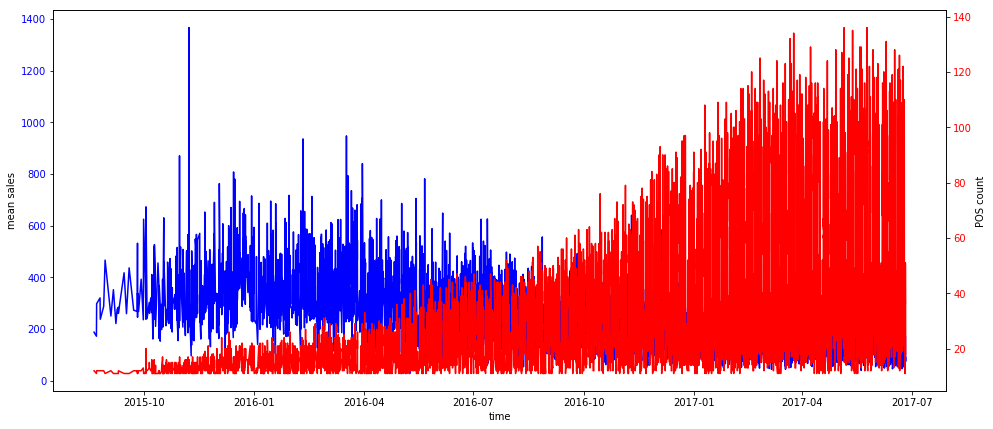

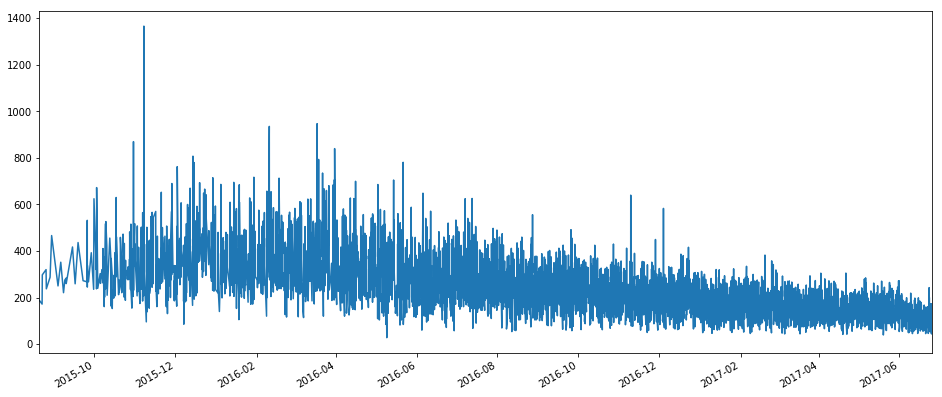

In [19]:
# create stats
printmd('**HOURLY STATS**')
sales_hourly = sales # sales.resample('H).sum()
hourly_shop_stats = sales_hourly.describe().transpose()
hourly_stats = sales.transpose().describe().transpose()
hourly_stats=hourly_stats[hourly_stats['count'] > 10]

# Create axes
fig, ax = plt.subplots(figsize=(16, 7))
ax1, ax2 = two_scales(ax, hourly_stats.index, hourly_stats['mean'], hourly_stats['count'], 'b', 'r','time','mean sales','POS count' )

# Change color of each axis
color_y_axis(ax1, 'b')
color_y_axis(ax2, 'r')
plt.show()
hourly_stats['mean'].plot(figsize=(16, 7))
plt.show()

**HOURLY PERFORMANCE**

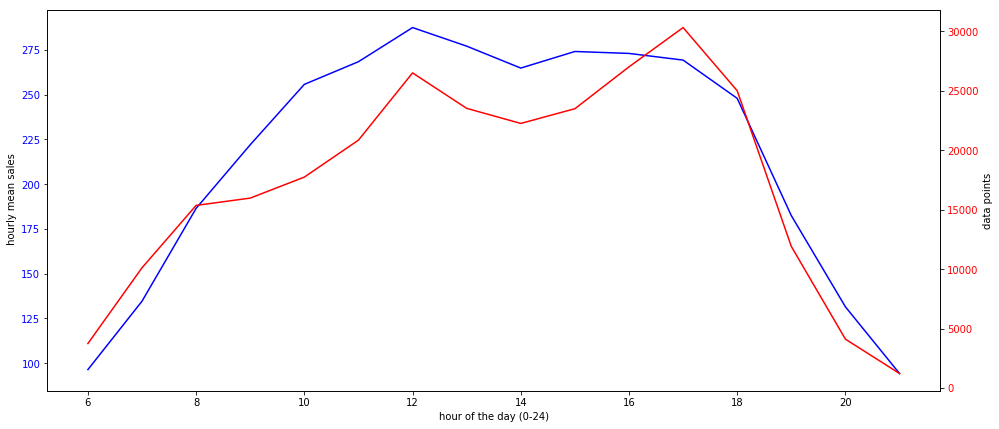

In [25]:
hour_of_day = hourly_stats.groupby([hourly_stats.index.hour,])['mean'].mean()
printmd('**HOURLY PERFORMANCE**')
# Create axes
fig, ax = plt.subplots(figsize=(16, 7))
ax1, ax2 = two_scales(ax,hour_of_day.index, hour_of_day, hourly_stats.groupby([hourly_stats.index.hour,])['count'].sum(), 'b', 'r','hour of the day (0-24)',' hourly mean sales','data points' )

# Change color of each axis
color_y_axis(ax1, 'b')
color_y_axis(ax2, 'r')
plt.show()

**HOURLY SHOP WISE STATS**

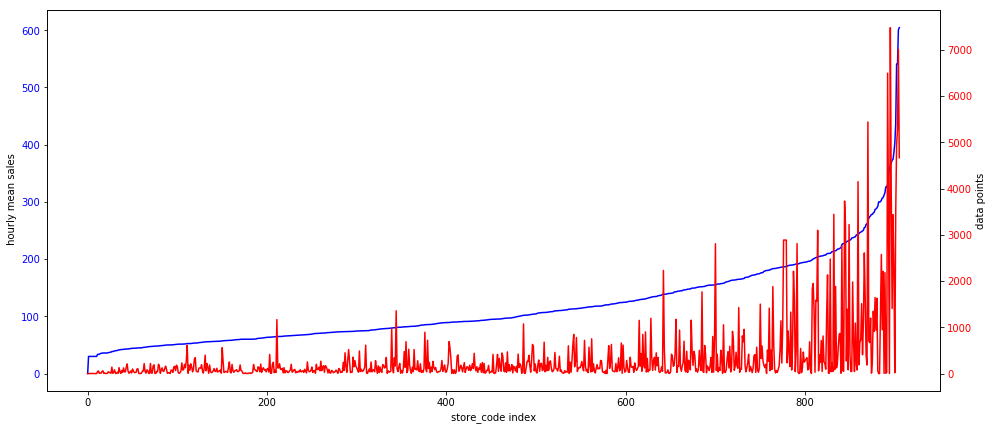

**HOURLY SHOP WISE STATS 2017**

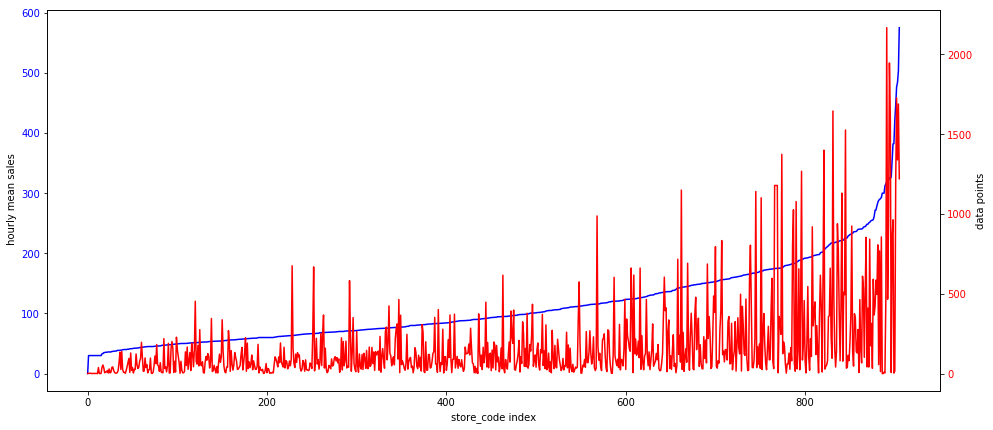

In [26]:
# create stats
printmd('**HOURLY SHOP WISE STATS**')
sales_hourly = sales
hourly_shop_stats = sales_hourly.describe().transpose()
hourly_shop_stats.sort_values(['mean'],inplace=True)

# Create axes
fig, ax = plt.subplots(figsize=(16, 7))
ax1, ax2 = two_scales(ax, range(0,hourly_shop_stats.shape[0]), hourly_shop_stats['mean'], hourly_shop_stats['count'], 'b', 'r','store_code index',' hourly mean sales','data points' )

# Change color of each axis
color_y_axis(ax1, 'b')
color_y_axis(ax2, 'r')
plt.show()
printmd('**HOURLY SHOP WISE STATS 2017**')
hourly_shop_stats_2017=sales_hourly['2017-01-01':'2017-08-01'].describe().transpose()
hourly_shop_stats_2017.sort_values(['mean'],inplace=True)
# Create axes
fig, ax = plt.subplots(figsize=(16, 7))
ax1, ax2 = two_scales(ax, range(0,hourly_shop_stats_2017.shape[0]), hourly_shop_stats_2017['mean'], hourly_shop_stats_2017['count'], 'b', 'r','store_code index',' hourly mean sales','data points' )

# Change color of each axis
color_y_axis(ax1, 'b')
color_y_axis(ax2, 'r')
plt.show()

In [27]:
sales_daily = sales.resample('D').sum()
printmd('**SHAPE:{0}**  **DENSITY:{1}**'.format(sales_daily.shape,sales_daily.to_sparse().density))
sales_daily.head()

**SHAPE:(693, 906)**  **DENSITY:0.18002159724014027**

store_code,10055,10077,10079,10081,10085,10086,10111,10176,10377,10384,...,84089,84125,84128,84146,84219,84223,84351,84608,84658,85011
2015-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1350.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,450.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1140.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,630.0,NaN,NaN,NaN,NaN,NaN,NaN


**DAILY STATS**

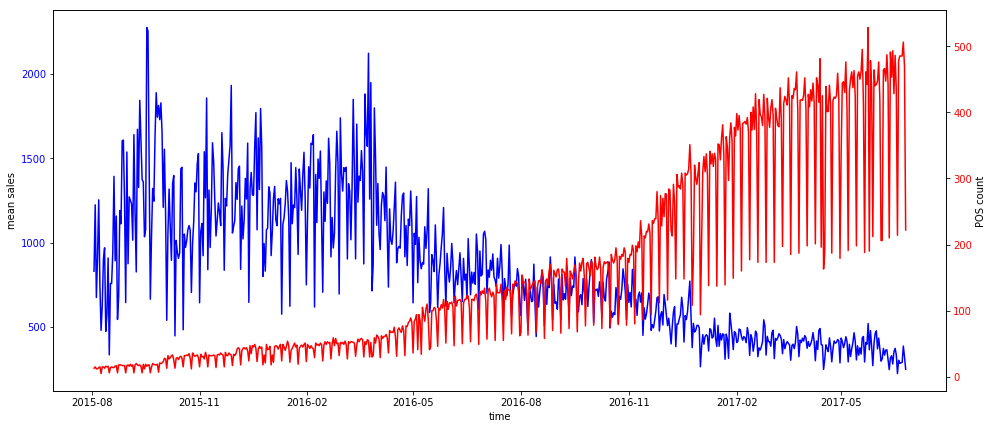

In [28]:
# create stats
printmd('**DAILY STATS**')
daily_shop_stats = sales_hourly.describe().transpose()
daily_stats = sales_daily.transpose().describe().transpose()

# Create axes
fig, ax = plt.subplots(figsize=(16, 7))
ax1, ax2 = two_scales(ax, daily_stats.index, daily_stats['mean'], daily_stats['count'], 'b', 'r','time','mean sales','POS count' )

# Change color of each axis
color_y_axis(ax1, 'b')
color_y_axis(ax2, 'r')
plt.show()

**DAY (of month) WISE PERFORMANCE**

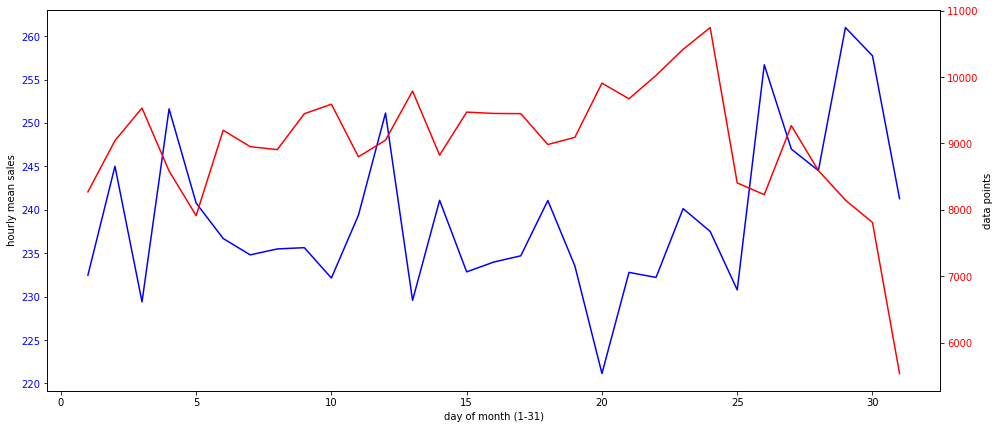

In [39]:
day_of_month = hourly_stats.groupby([hourly_stats.index.day,])['mean'].mean()
printmd('**DAY (of month) WISE PERFORMANCE**')
# Create axes
fig, ax = plt.subplots(figsize=(16, 7))
ax1, ax2 = two_scales(ax,day_of_month.index, day_of_month, hourly_stats.groupby([hourly_stats.index.day,])['count'].sum(), 'b', 'r','day of month (1-31)',' hourly mean sales','data points' )

# Change color of each axis
color_y_axis(ax1, 'b')
color_y_axis(ax2, 'r')
plt.show()

**DAY (of week) WISE PERFORMANCE**

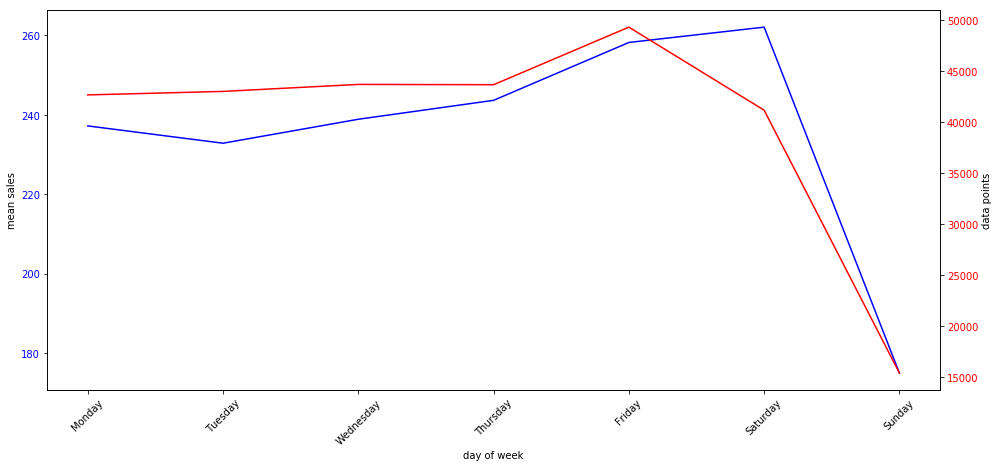

In [48]:
day_of_week = hourly_stats.groupby([hourly_stats.index.weekday,])['mean'].mean()
printmd('**DAY (of week) WISE PERFORMANCE**')
# Create axes
fig, ax = plt.subplots(figsize=(16, 7))
ax1, ax2 = two_scales(ax,day_of_week.index, day_of_week, hourly_stats.groupby([hourly_stats.index.weekday,])['count'].sum(), 'b', 'r','day of week','mean sales','data points' )
ax.set_xticklabels([None,"Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"],
                   rotation=45)
# Change color of each axis
color_y_axis(ax1, 'b')
color_y_axis(ax2, 'r')
plt.show()


In [49]:
sales_weekly = sales.resample('W').sum()
printmd('**SHAPE:{0}**  **DENSITY:{1}**'.format(sales_weekly.shape,sales_weekly.to_sparse().density))
sales_weekly.head()

**SHAPE:(99, 906)**  **DENSITY:0.3355742859054117**

store_code,10055,10077,10079,10081,10085,10086,10111,10176,10377,10384,...,84089,84125,84128,84146,84219,84223,84351,84608,84658,85011
2015-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3870.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3150.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6600.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10320.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7290.0,NaN,NaN,NaN,NaN,NaN,NaN


**WEEKLY STATS**

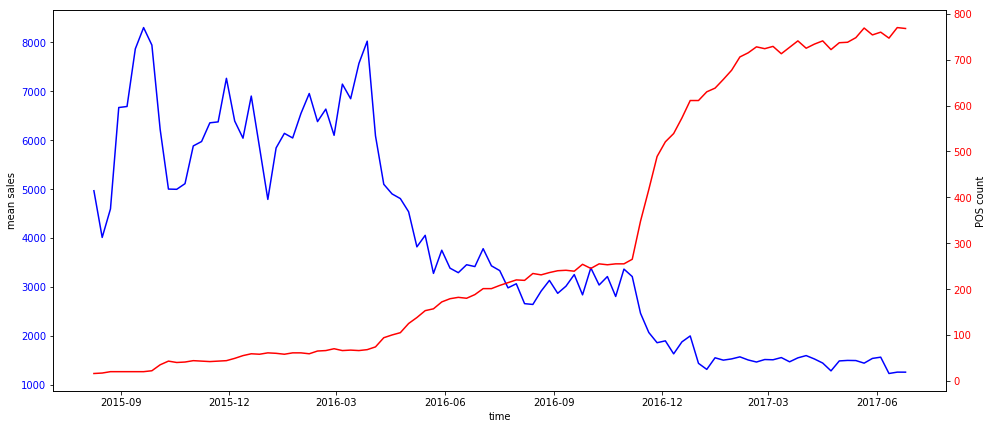

In [50]:
# create stats
printmd('**WEEKLY STATS**')
weekly_shop_stats = sales_weekly.describe().transpose()
weekly_stats = sales_weekly.transpose().describe().transpose()

# Create axes
fig, ax = plt.subplots(figsize=(16, 7))
ax1, ax2 = two_scales(ax, weekly_stats.index, weekly_stats['mean'], weekly_stats['count'], 'b', 'r','time','mean sales','POS count' )

# Change color of each axis
color_y_axis(ax1, 'b')
color_y_axis(ax2, 'r')
plt.show()

In [51]:
sales_monthly = sales.resample('M').sum()
printmd('**SHAPE:{0}**  **DENSITY:{1}**'.format(sales_monthly.shape,sales_monthly.to_sparse().density))
sales_monthly.head()

**SHAPE:(23, 906)**  **DENSITY:0.40306171417602454**

store_code,10055,10077,10079,10081,10085,10086,10111,10176,10377,10384,...,84089,84125,84128,84146,84219,84223,84351,84608,84658,85011
2015-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,25200.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,52980.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3630.0,...,NaN,NaN,NaN,62010.0,NaN,NaN,NaN,14700.0,NaN,NaN
2015-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7110.0,...,NaN,NaN,NaN,70740.0,NaN,NaN,NaN,12090.0,NaN,NaN
2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7380.0,...,NaN,NaN,NaN,88290.0,NaN,NaN,NaN,15540.0,NaN,NaN


**MONTHLY SHOP STATS**

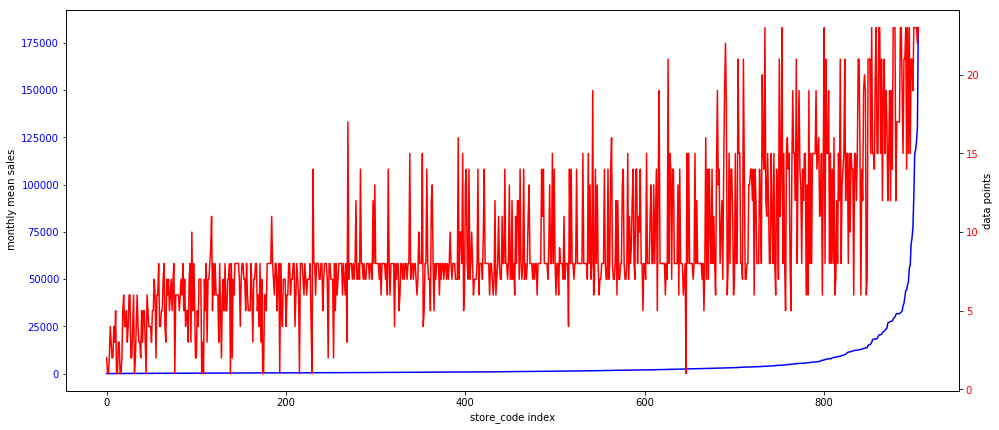

**MONTHLY SHOP STATS 2017**

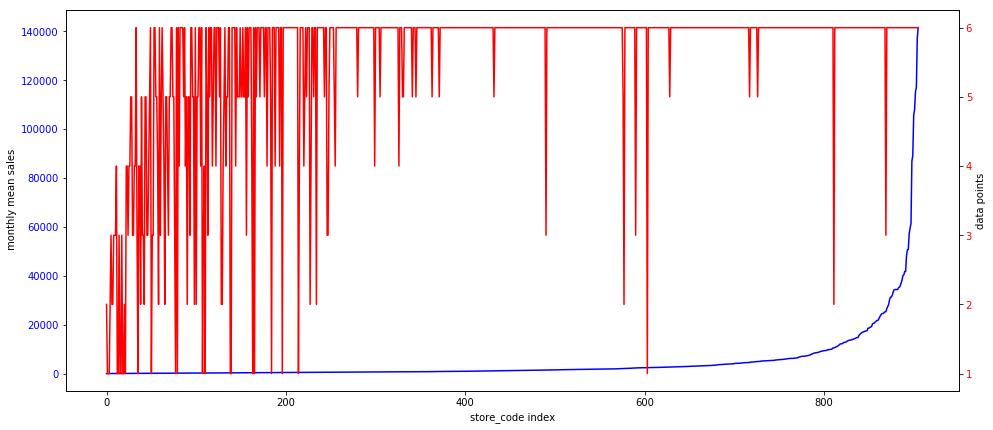

In [52]:
# create stats
printmd('**MONTHLY SHOP STATS**')
monthly_shop_stats = sales_monthly.describe().transpose()
monthly_shop_stats.sort_values(['mean'],inplace=True)

# Create axes
fig, ax = plt.subplots(figsize=(16, 7))
ax1, ax2 = two_scales(ax, range(0,monthly_shop_stats.shape[0]), monthly_shop_stats['mean'], monthly_shop_stats['count'], 'b', 'r','store_code index',' monthly mean sales','data points' )

# Change color of each axis
color_y_axis(ax1, 'b')
color_y_axis(ax2, 'r')
plt.show()

printmd('**MONTHLY SHOP STATS 2017**')
monthly_shop_stats_2017=sales_monthly['2017-01-01':'2017-08-01'].describe().transpose()
monthly_shop_stats_2017.sort_values(['mean'],inplace=True)
# Create axes
fig, ax = plt.subplots(figsize=(16, 7))
ax1, ax2 = two_scales(ax, range(0,monthly_shop_stats_2017.shape[0]), monthly_shop_stats_2017['mean'], monthly_shop_stats_2017['count'], 'b', 'r','store_code index',' monthly mean sales','data points' )

# Change color of each axis
color_y_axis(ax1, 'b')
color_y_axis(ax2, 'r')
plt.show()

**MONTHLY STATS**

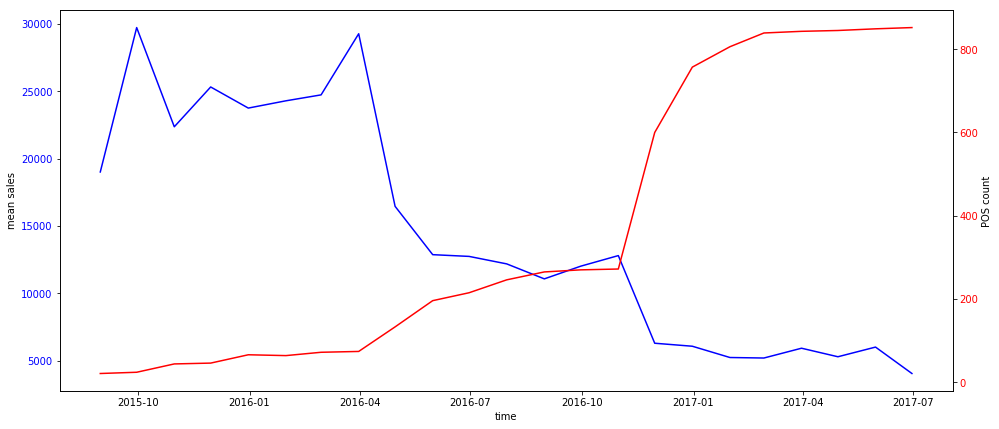

In [53]:
# create stats
printmd('**MONTHLY STATS**')
monthly_shop_stats = sales_monthly.describe().transpose()
monthly_stats = sales_monthly.transpose().describe().transpose()

# Create axes
fig, ax = plt.subplots(figsize=(16, 7))
ax1, ax2 = two_scales(ax, monthly_stats.index, monthly_stats['mean'], monthly_stats['count'], 'b', 'r','time','mean sales','POS count' )

# Change color of each axis
color_y_axis(ax1, 'b')
color_y_axis(ax2, 'r')
plt.show()


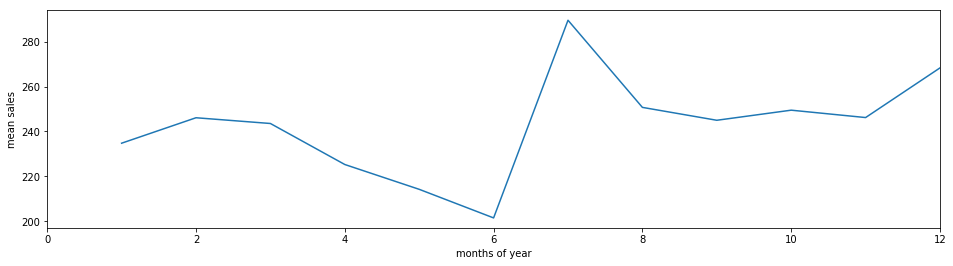

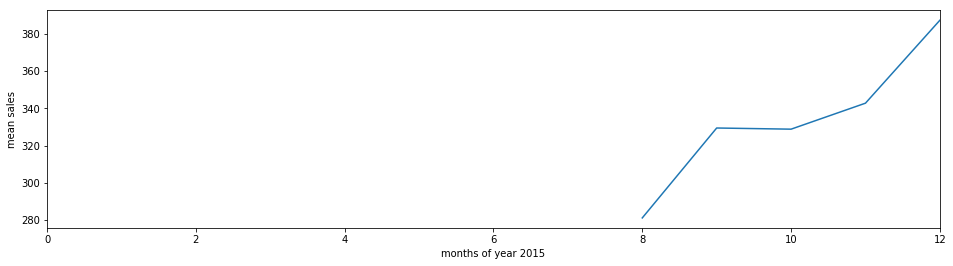

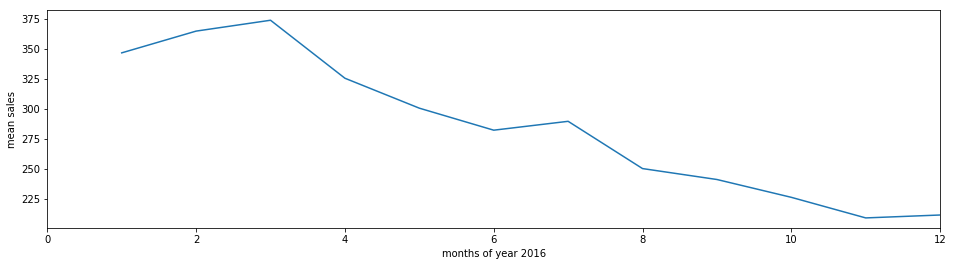

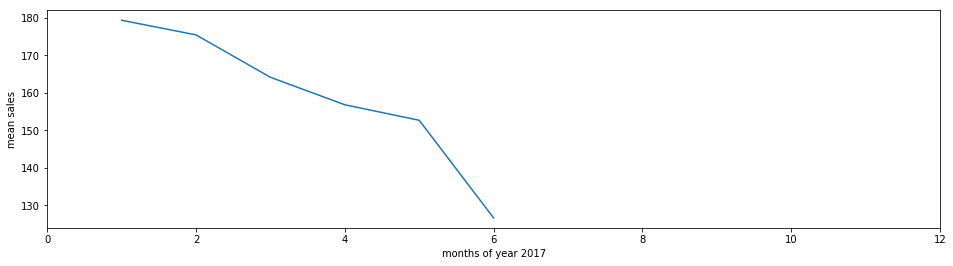

In [65]:
month_of_year = hourly_stats.groupby([hourly_stats.index.month,])['mean'].mean()
month_of_year.plot(figsize=(16, 4))
plt.ylabel('mean sales')
plt.xlabel('months of year')
plt.xlim([0,12])
plt.show()
month_of_year = hourly_stats['2015-01-01':'2015-12-31'].groupby([hourly_stats['2015-01-01':'2015-12-31'].index.month,])['mean'].mean()
month_of_year.plot(figsize=(16, 4))
plt.ylabel('mean sales')
plt.xlabel('months of year 2015')
plt.xlim([0,12])
plt.show()
month_of_year = hourly_stats['2016-01-01':'2016-12-31'].groupby([hourly_stats['2016-01-01':'2016-12-31'].index.month,])['mean'].mean()
month_of_year.plot(figsize=(16, 4))
plt.ylabel('mean sales')
plt.xlabel('months of year 2016')
plt.xlim([0,12])
plt.show()
month_of_year = hourly_stats['2017-01-01':'2017-12-31'].groupby([hourly_stats['2017-01-01':'2017-12-31'].index.month,])['mean'].mean()
month_of_year.plot(figsize=(16, 4))
plt.ylabel('mean sales')
plt.xlabel('months of year 2017')
plt.xlim([0,12])
plt.show()

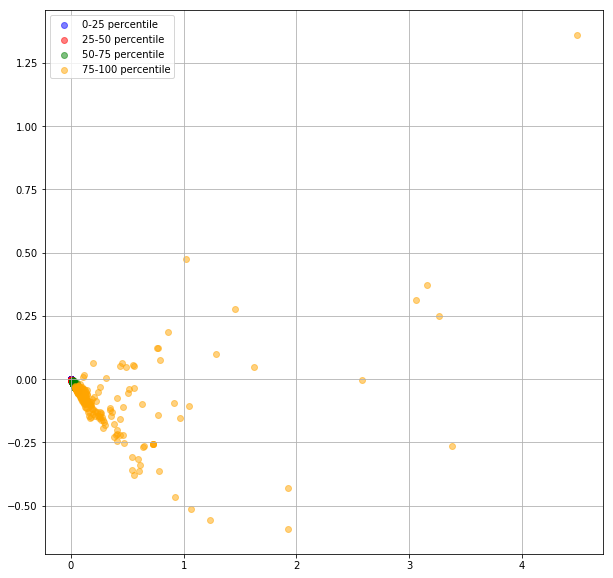

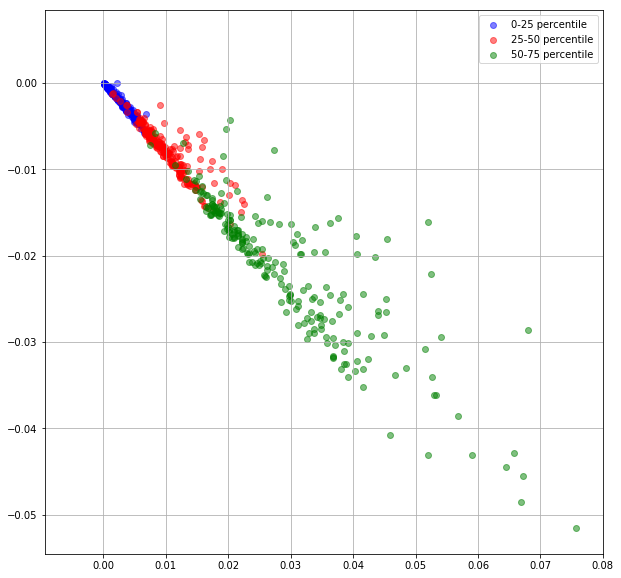

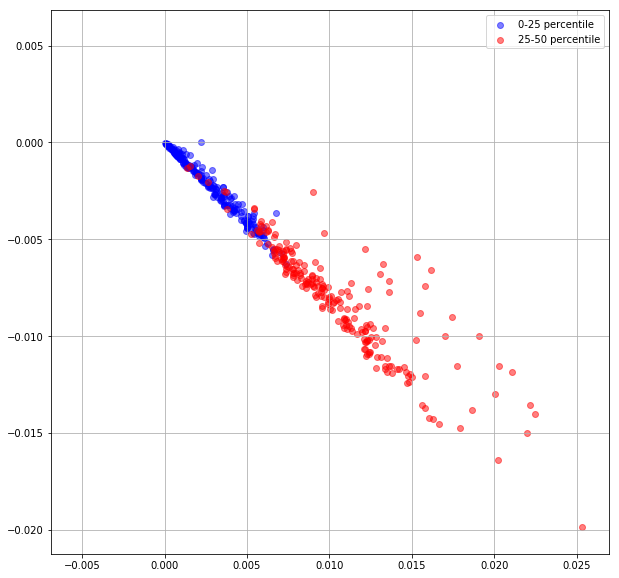

In [67]:
# classify the data set
data = sales_monthly.transpose()
data['mean sales'] = monthly_shop_stats['mean']
X = sales_monthly.transpose()
X = sparse.csr_matrix(X.fillna(0))
X_scaled = preprocessing.maxabs_scale(X)
data['mean sales label']=pd.qcut(data['mean sales'],4, labels=['0-25 percentile','25-50 percentile','50-75 percentile','75-100 percentile'])
y = data['mean sales label'].values
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1
label_dict = {1: '0-25 percentile', 2: '25-50 percentile', 3:'50-75 percentile', 4:'75-100 percentile'}

svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
svd.fit(X_scaled)
X=svd.fit_transform(X_scaled)

fig1,ax = plt.subplots(figsize=(10, 10))
for lab,col in zip(range(1,5), ('blue', 'red', 'green','orange')):
        ax.scatter(X[y==lab, 0], X[y==lab, 1], c=col,alpha=0.5,label='{}'.format(label_dict[lab]))
ax.legend()
ax.grid(True)
plt.show()

fig2,ax = plt.subplots(figsize=(10, 10))
for lab,col in zip(range(1,4), ('blue', 'red', 'green')):
        ax.scatter(X[y==lab, 0], X[y==lab, 1], c=col,alpha=0.5,label='{}'.format(label_dict[lab]))
ax.legend()
ax.grid(True)
plt.show()

fig3,ax = plt.subplots(figsize=(10, 10))
for lab,col in zip(range(1,3), ('blue', 'red')):
        ax.scatter(X[y==lab, 0], X[y==lab, 1], c=col,alpha=0.5,label='{}'.format(label_dict[lab]))
ax.grid(True)
ax.legend()
plt.show()

#fig = tls.mpl_to_plotly(fig1)
#fig['layout'].update(showlegend=True)
#py.iplot(fig)

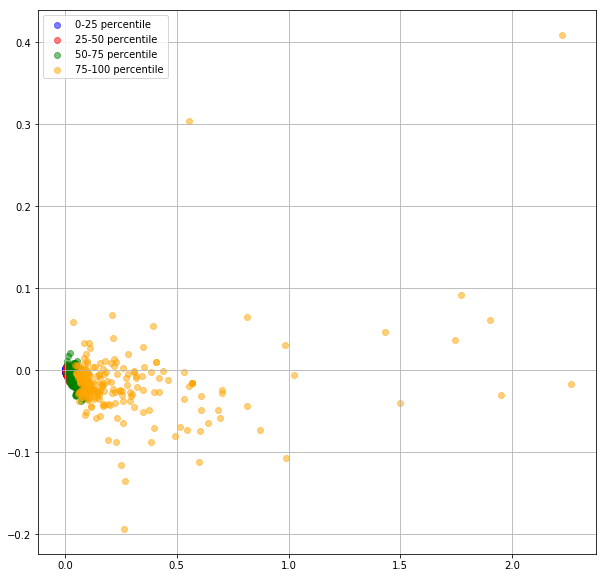

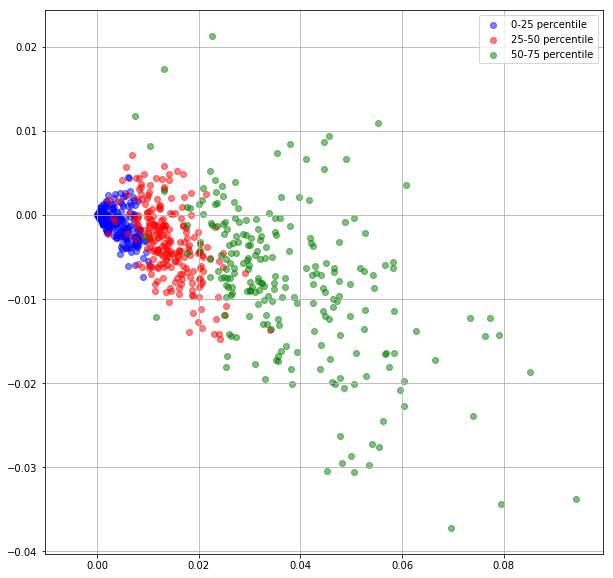

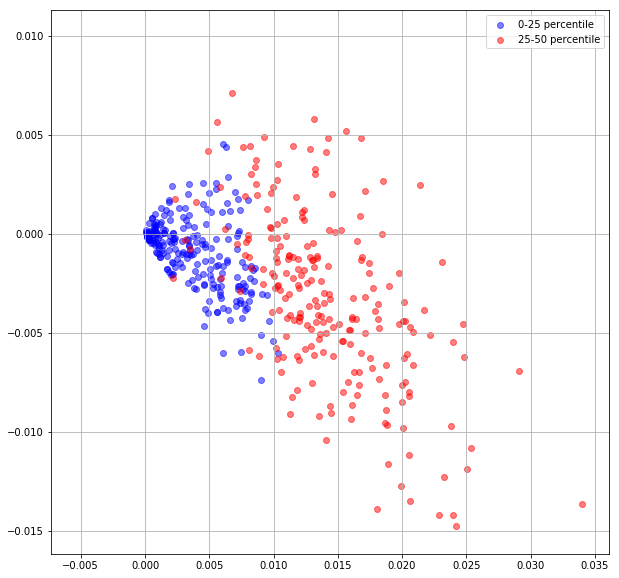

In [68]:
data = sales_monthly['2017-01-01':'2017-08-01'].transpose()
data['mean sales'] = monthly_shop_stats['mean']
X = sales_monthly['2017-01-01':'2017-08-01'].transpose()
X = sparse.csr_matrix(X.fillna(0))
X_scaled = preprocessing.maxabs_scale(X)
data['mean sales label']=pd.qcut(data['mean sales'],4, labels=['0-25 percentile','25-50 percentile','50-75 percentile','75-100 percentile'])
y = data['mean sales label'].values
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1
label_dict = {1: '0-25 percentile', 2: '25-50 percentile', 3:'50-75 percentile', 4:'75-100 percentile'}

svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
svd.fit(X_scaled)
X=svd.fit_transform(X_scaled)

fig1,ax = plt.subplots(figsize=(10, 10))
for lab,col in zip(range(1,5), ('blue', 'red', 'green','orange')):
        ax.scatter(X[y==lab, 0], X[y==lab, 1], c=col,alpha=0.5,label='{}'.format(label_dict[lab]))
ax.legend()
ax.grid(True)
plt.show()

fig2,ax = plt.subplots(figsize=(10, 10))
for lab,col in zip(range(1,4), ('blue', 'red', 'green')):
        ax.scatter(X[y==lab, 0], X[y==lab, 1], c=col,alpha=0.5,label='{}'.format(label_dict[lab]))
ax.legend()
ax.grid(True)
plt.show()

fig3,ax = plt.subplots(figsize=(10, 10))
for lab,col in zip(range(1,3), ('blue', 'red')):
        ax.scatter(X[y==lab, 0], X[y==lab, 1], c=col,alpha=0.5,label='{}'.format(label_dict[lab]))
ax.grid(True)
ax.legend()
plt.show()





In [70]:
#target variable
data = sales_monthly['2017-01-01':'2017-08-01'].transpose()
data['mean sales'] = monthly_shop_stats['mean']
data['mean sales label']=pd.qcut(data['mean sales'],4, labels=['0-25 percentile','25-50 percentile','50-75 percentile','75-100 percentile'])
TV=data[['mean sales','mean sales label']]

In [234]:
TV.describe()

,mean sales,store_code
count,906.000000,906.000000
mean,4386.826782,28747.131347
std,12949.896250,17220.398724
min,0.000000,249.000000
25%,445.848214,20149.250000
50%,1040.714286,25727.500000
75%,2865.937500,30833.250000
max,183032.608696,85011.000000


In [72]:
# load feature dictionary
with open(surroundings_path, 'r') as f:
    surroundings = json.loads(f.read())
surroundings = json_normalize(surroundings)

In [73]:
surroundings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 90 columns):
store_code                              546 non-null int64
surroundings.accounting                 546 non-null object
surroundings.airport                    546 non-null object
surroundings.amusement_park             546 non-null object
surroundings.aquarium                   546 non-null object
surroundings.art_gallery                546 non-null object
surroundings.atm                        546 non-null object
surroundings.bakery                     546 non-null object
surroundings.bank                       546 non-null object
surroundings.bar                        546 non-null object
surroundings.beauty_salon               546 non-null object
surroundings.bicycle_store              546 non-null object
surroundings.book_store                 546 non-null object
surroundings.bowling_alley              546 non-null object
surroundings.bus_station                546 non-null obj

In [74]:
#check structure
print(surroundings.iloc[0]['surroundings.atm'])

[{'website': 'https://www.ubs.com/ch/fr.html', 'rating': 3.1, 'place_id': 'ChIJSdtepAJwjEcRVpHJRfIK37M', 'name': 'UBS Financial Services Inc.', 'opening_hours': {'weekday_text': ['Monday: 9:00 AM – 5:00 PM', 'Tuesday: 9:00 AM – 5:00 PM', 'Wednesday: 9:00 AM – 5:00 PM', 'Thursday: 9:00 AM – 5:00 PM', 'Friday: 9:00 AM – 5:00 PM', 'Saturday: Closed', 'Sunday: Closed'], 'open_now': False, 'periods': [{'close': {'day': 1, 'time': '1700'}, 'open': {'day': 1, 'time': '0900'}}, {'close': {'day': 2, 'time': '1700'}, 'open': {'day': 2, 'time': '0900'}}, {'close': {'day': 3, 'time': '1700'}, 'open': {'day': 3, 'time': '0900'}}, {'close': {'day': 4, 'time': '1700'}, 'open': {'day': 4, 'time': '0900'}}, {'close': {'day': 5, 'time': '1700'}, 'open': {'day': 5, 'time': '0900'}}]}, 'user_ratings_total': 7, 'international_phone_number': '+41 22 869 25 88', 'longitude': 6.194029, 'reviews': [{'rating': 4, 'author_name': 'mar lmt', 'language': 'en', 'text': 'Friendly staff members with excellent English 

In [75]:
# feature creation ???? investigate more 
def cnt(entities):
    if type(entities) == list:
        if len(entities) == 0:
            return np.nan
        else:
            return len(entities)
    else:
        return entities

s=surroundings
s=s.applymap(cnt)
printmd('**SHAPE : {0}** **DENSITY: {1}**'.format(s.shape,s.to_sparse().density))

**SHAPE : (546, 90)** **DENSITY: 0.35185185185185186**

In [77]:
# removing features with 0 variance
# attribute variance
print(s.var(skipna=True).sort_values())

"""
movie_rental                  0.000000
convenience_store             0.000000
bowling_alley                 0.000000
cemetery                      0.000000
synagogue                     0.000000
casino                        0.000000
zoo                           0.000000
airport                       0.000000
roofing_contractor            0.000000
surroundings.aquarium            NaN
surroundings.hindu_temple        NaN
surroundings.rv_park             NaN

"""
features = s.columns.values.tolist()
features.remove('store_code')
features.remove('surroundings.movie_rental')
features.remove('surroundings.convenience_store')
features.remove('surroundings.bowling_alley')
features.remove('surroundings.cemetery')
features.remove('surroundings.synagogue')
features.remove('surroundings.casino')
features.remove('surroundings.zoo')
features.remove('surroundings.airport')
features.remove('surroundings.roofing_contractor')
features.remove('surroundings.hindu_temple')
features.remove('surroundings.rv_park')
features.remove('surroundings.aquarium')
feature_dict = {i:'{}'.format(label.split('.')[1]) for i,label in zip(range(len(features)),features)}
feature_dict

#from sklearn.feature_selection import VarianceThreshold
#sel = VarianceThreshold(threshold=(.9 * (1 - .9)))
#sel.fit_transform(data)

surroundings.casino                     0.000000e+00
surroundings.airport                    0.000000e+00
surroundings.synagogue                  0.000000e+00
surroundings.roofing_contractor         0.000000e+00
surroundings.bowling_alley              0.000000e+00
surroundings.movie_rental               0.000000e+00
surroundings.convenience_store          0.000000e+00
surroundings.cemetery                   0.000000e+00
surroundings.hardware_store             1.923077e-02
surroundings.train_station              3.553028e-02
surroundings.fire_station               6.236559e-02
surroundings.mosque                     1.141304e-01
surroundings.plumber                    1.322115e-01
surroundings.taxi_stand                 1.379310e-01
surroundings.pet_store                  1.394958e-01
surroundings.courthouse                 1.436782e-01
surroundings.meal_delivery              1.646386e-01
surroundings.car_wash                   2.050420e-01
surroundings.funeral_home               2.1428

{0: 'accounting',
 1: 'amusement_park',
 2: 'art_gallery',
 3: 'atm',
 4: 'bakery',
 5: 'bank',
 6: 'bar',
 7: 'beauty_salon',
 8: 'bicycle_store',
 9: 'book_store',
 10: 'bus_station',
 11: 'cafe',
 12: 'campground',
 13: 'car_dealer',
 14: 'car_rental',
 15: 'car_repair',
 16: 'car_wash',
 17: 'church',
 18: 'city_hall',
 19: 'clothing_store',
 20: 'courthouse',
 21: 'dentist',
 22: 'department_store',
 23: 'doctor',
 24: 'electrician',
 25: 'electronics_store',
 26: 'embassy',
 27: 'fire_station',
 28: 'florist',
 29: 'funeral_home',
 30: 'furniture_store',
 31: 'gas_station',
 32: 'gym',
 33: 'hair_care',
 34: 'hardware_store',
 35: 'home_goods_store',
 36: 'hospital',
 37: 'insurance_agency',
 38: 'jewelry_store',
 39: 'laundry',
 40: 'lawyer',
 41: 'library',
 42: 'liquor_store',
 43: 'local_government_office',
 44: 'locksmith',
 45: 'lodging',
 46: 'meal_delivery',
 47: 'meal_takeaway',
 48: 'mosque',
 49: 'movie_theater',
 50: 'moving_company',
 51: 'museum',
 52: 'night_club',

In [78]:
# add target variable
TV['store_code']=TV.index
s=pd.merge(s, TV,how='inner',on=['store_code'])

/Users/shivam.pahuja/PycharmProjects/data-science/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [79]:
data_col=features + ['mean sales','mean sales label']
data = s[data_col]
data.index=s['store_code']
data.columns = [l for i,l in sorted(feature_dict.items())] + ['mean sales','mean sales label']

In [85]:
X = data[[l for i,l in sorted(feature_dict.items())]].fillna(0).values
y = data['mean sales label'].values
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1
label_dict = {1: '0-25 percentile', 2: '25-50 percentile', 3:'50-75 percentile', 4:'75-100 percentile'}

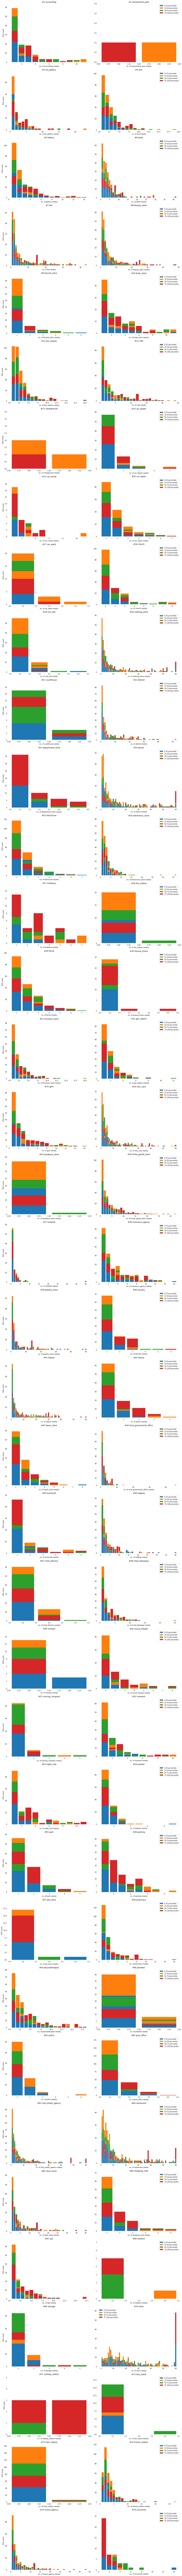

In [81]:
# feature distibution plots

fig, axes = plt.subplots(nrows=len(feature_dict.keys())//2, ncols=2, figsize=(16,225))
for ax,cnt in zip(axes.ravel(), range(len(feature_dict.keys()))):  

    # set bin sizes
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)

    b1=None
    # plottling the bars   
    for lab,col in zip(range(1,5), ('blue', 'red', 'green','orange')):
        x = list(np.unique(X[:,cnt]))
        x.remove(0)
        unique, counts = np.unique(X[y==lab, cnt], return_counts=True)
        counts = dict(zip(unique, counts))
        missing = list(set(x) - set(unique))
        missing = dict((el,0) for el in missing)
        counts.update(missing)
        counts=dict(sorted(counts.items()))
        counts.pop(0, None)
        b2 = list(counts.values())
        p=ax.bar(x, b2,width =0.85,bottom=b1,label='{}'.format(label_dict[lab]))
        b1 = b2

    ylims = ax.get_ylim()    
    # plot annotation
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel('no. of {} nearby'.format(feature_dict[cnt]))
    ax.set_title('#{0} {1}'.format(str(cnt+1),feature_dict[cnt]))

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    
    
    axes[cnt//2][0].set_ylabel('POS count')
    if cnt % 2 != 0:
        ax.legend()

fig.tight_layout()       
plt.show()

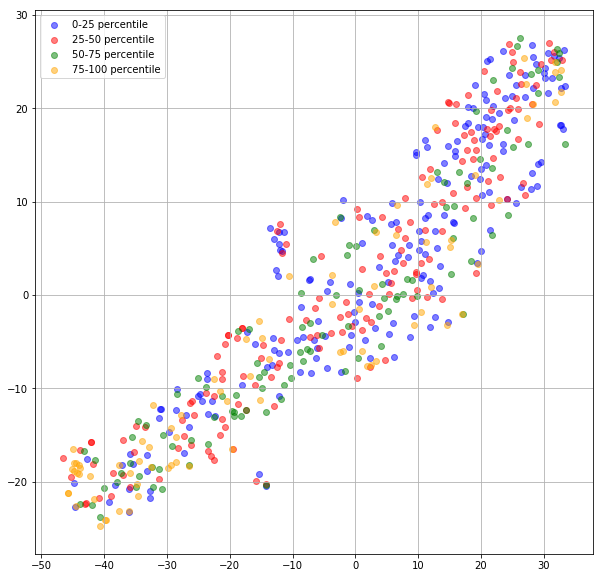

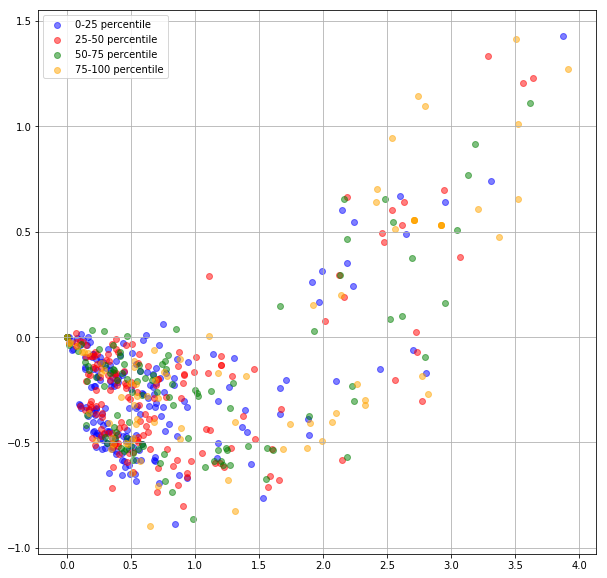

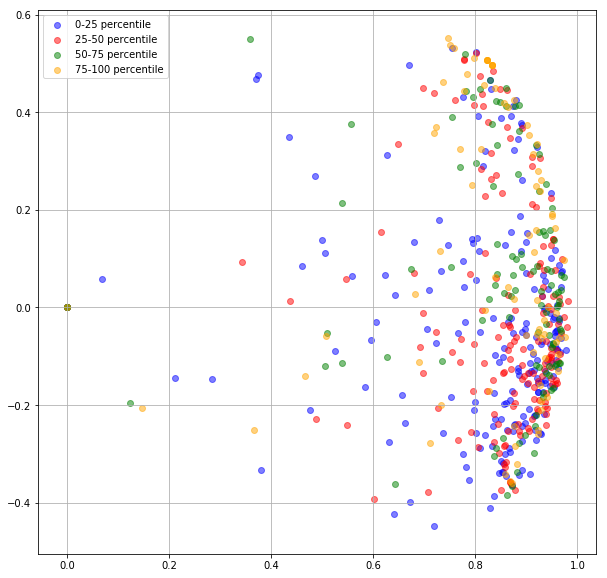

In [89]:
#scatter plots

X = data[[l for i,l in sorted(feature_dict.items())]].fillna(0).values
X_scaled = preprocessing.scale(X)
# TSNE can't handle sparse data
X = TSNE(n_components=2).fit_transform(X)

fig1,ax = plt.subplots(figsize=(10, 10))
for lab,col in zip(range(1,5), ('blue', 'red', 'green','orange')):
        ax.scatter(X[y==lab, 0], X[y==lab, 1], c=col,alpha=0.5,label='{}'.format(label_dict[lab]))
ax.legend()
ax.grid(True)
plt.show()


# min max scaled and sparse
X = data[[l for i,l in sorted(feature_dict.items())]].fillna(0).values
X = sparse.csr_matrix(X)
X_scaled = preprocessing.maxabs_scale(X)

svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
svd.fit(X_scaled)
X=svd.fit_transform(X_scaled)
fig1,ax = plt.subplots(figsize=(10, 10))
for lab,col in zip(range(1,5), ('blue', 'red', 'green','orange')):
        ax.scatter(X[y==lab, 0], X[y==lab, 1], c=col,alpha=0.5,label='{}'.format(label_dict[lab]))
ax.legend()
ax.grid(True)
plt.show()

#normalised data
X = data[[l for i,l in sorted(feature_dict.items())]].fillna(0).values
X_normalized = preprocessing.normalize(X, norm='l2')
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
svd.fit(X_normalized)
X=svd.fit_transform(X_normalized)

fig1,ax = plt.subplots(figsize=(10, 10))
for lab,col in zip(range(1,5), ('blue', 'red', 'green','orange')):
        ax.scatter(X[y==lab, 0], X[y==lab, 1], c=col,alpha=0.5,label='{}'.format(label_dict[lab]))
ax.legend()
ax.grid(True)
plt.show()

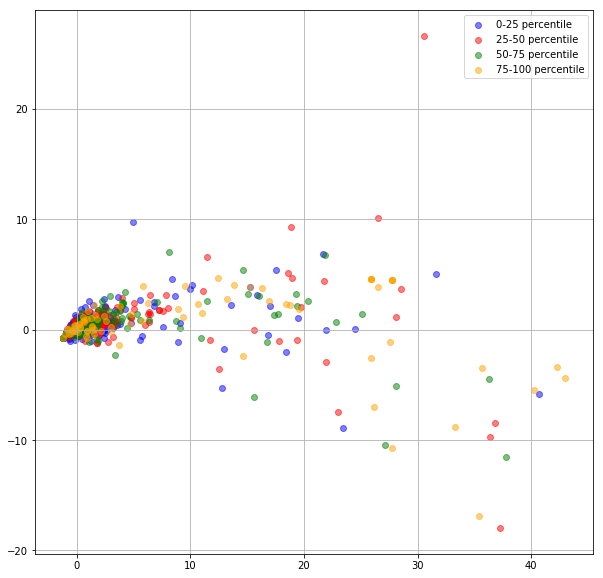

In [116]:
# robust scaling to hadle outliers
X = data[[l for i,l in sorted(feature_dict.items())]].fillna(0).values
X_scaled = preprocessing.robust_scale(X)

svd = TruncatedSVD(n_components=2,algorithm='arpack' ,n_iter=7, random_state=42)
svd.fit(X_scaled)
X=svd.fit_transform(X_scaled)
fig1,ax = plt.subplots(figsize=(10, 10))
for lab,col in zip(range(1,5), ('blue', 'red', 'green','orange')):
        ax.scatter(X[y==lab, 0], X[y==lab, 1], c=col,alpha=0.5,label='{}'.format(label_dict[lab]))
ax.legend()
ax.grid(True)
plt.show()

## Stage 6: Data preparation
This stage encompasses all activities to construct the data set that will be used in the subsequent modeling stage. Data preparation activities include data cleaning (dealing with missing or invalid values, eliminating duplicates, formatting properly), combining data from multiple sources ( files, tables, platforms) and transforming data into more useful variables.
In a process called feature engineering, data scientists can create additional explanatory variables, also referred to as predictors or features, through a combination of domain knowledge and existing structured variables. When text data is available, such as customer call center logs or physicians’ notes in unstructured or semi-structured form, text analytics is useful in deriving new structured variables to enrich the set of predictors and improve model accuracy.
Data preparation is usually the most time-consuming step in a data science project. In many domains, some data preparation steps are common across different problems. Automating certain data preparation steps in advance may accelerate the process by minimizing ad hoc preparation time. With today’s high-performance, massively parallel systems and analytic functionality residing where the data is stored, data scientists can more easily and rapidly prepare data using very large data sets.






In [451]:
def cnt(entities):
    # ?? investigate better logic
    if type(entities) == list:
        if len(entities) == 0:
            return np.nan
        else:
            return len(entities)
    else:
        return entities

def prepare_data(raw_data=surroundings,features=None,target_variable=TV,type='C',sprse=False):
    """
    :param raw_data: 
    :param features: 
    :param target_variable: 
    :param type: 
    :param sprse: 
    :return: 
    """
    data=raw_data.applymap(cnt)
    if not features:
        features = data.columns.values.tolist()
        features.remove('store_code')
        features.remove('surroundings.movie_rental')
        features.remove('surroundings.convenience_store')
        features.remove('surroundings.bowling_alley')
        features.remove('surroundings.cemetery')
        features.remove('surroundings.synagogue')
        features.remove('surroundings.casino')
        features.remove('surroundings.zoo')
        features.remove('surroundings.airport')
        features.remove('surroundings.roofing_contractor')
        features.remove('surroundings.hindu_temple')
        features.remove('surroundings.rv_park')
        features.remove('surroundings.aquarium')
        
        feature_dict = {i:'{}'.format(label.split('.')[1]) for i,label in zip(range(len(features)),features)}
    else:
        feature_dict =dict(zip(range(len(features)),features))
        features =['surroundings.{}'.format(f) for f in features]
    target_variable['store_code']=target_variable.index
    data=pd.merge(data, target_variable,how='inner',on=['store_code'])
    data_col=features + ['mean sales','mean sales label']
    data = data[data_col]
    data.index=raw_data['store_code']
    data.columns = [l for i,l in sorted(feature_dict.items())] + ['mean sales','mean sales label']
    X = data[[l for i,l in sorted(feature_dict.items())]].fillna(0).values
    X_scaled = preprocessing.maxabs_scale(X)
    X_normalized = preprocessing.normalize(X, norm='l2')   
    if sprse:
        X = sparse.csr_matrix(X)
        X_scaled = preprocessing.maxabs_scale(X)
    if type=='C':
        # continous output
        y = data['mean sales'].values
        y_scaled = preprocessing.scale(y)
        return X,X_scaled,y,y_scaled,features,feature_dict


    elif type=='D':
        # discrete/categorical output
        y = data['mean sales label'].values
        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y_labeled = label_encoder.transform(y) + 1
        label_dict = {1: '0-25 percentile', 2: '25-50 percentile', 3:'50-75 percentile', 4:'75-100 percentile'}
        return X,X_scaled,y,y_labeled,features,feature_dict,label_dict

X,X_scaled,y,y_scaled,features,feature_dict = prepare_data()

## Stage 7: Modeling
Starting with the first version of the prepared data set, the modeling stage focuses on developing predictive or descriptive models according to the previously defined analytic approach. With predictive models, data scientists use a training set (historical data in which the outcome of interest is known)
to build the model. The modeling process is typically highly iterative as organizations gain intermediate insights, leading to re nements in data preparation and model speci cation. For
a given technique, data scientists may try multiple algorithms with their respective parameters to  nd the best model for the available variables.


In [331]:
# Pearson’s Correlation: 
#It is used as a measure for quantifying linear dependence between two continuous variables X and Y. 
#Its value varies from -1 to +1. Pearson’s correlation is given as:fs2
X,X_scaled,y,y_scaled,features,feature_dict = prepare_data()
pearson_correlation = dict()
for col,feature in feature_dict.items():
    pearson_correlation[feature]=sp.stats.pearsonr(X_scaled[:,col],y)[0]
pearson_correlation=sorted(pearson_correlation.items(), key=operator.itemgetter(1),reverse=True)  
print('\n'.join(['{} correlation : {}'.format(f,v) for (f,v) in pearson_correlation]))
def top_feature_pearson(n=10):
    X,X_scaled,y,y_scaled,features,feature_dict = prepare_data()
    pearson_correlation = dict()
    for col,feature in feature_dict.items():
        pearson_correlation[feature]=sp.stats.pearsonr(X_scaled[:,col],y)[0]
    pearson_correlation=sorted(pearson_correlation.items(), key=operator.itemgetter(1),reverse=True) 
    features = [f for (f,v) in sorted(pearson_correlation)]
    return list(features[:n])
    

pharmacy correlation : 0.4192896254279521
real_estate_agency correlation : 0.3904012767642926
lawyer correlation : 0.366426448010073
library correlation : 0.3646862274159987
dentist correlation : 0.35615833772628724
cafe correlation : 0.3526462619439925
physiotherapist correlation : 0.3492192844591271
laundry correlation : 0.34891813590039455
doctor correlation : 0.3383756360303206
beauty_salon correlation : 0.3346338381212353
clothing_store correlation : 0.3291748778757679
bus_station correlation : 0.3272170107369164
hair_care correlation : 0.32572708708805703
transit_station correlation : 0.3226149350220076
travel_agency correlation : 0.3182969573589141
spa correlation : 0.31016291980465527
subway_station correlation : 0.2908532307048699
insurance_agency correlation : 0.2852817930132953
shoe_store correlation : 0.27674074489238815
bakery correlation : 0.27524448030022636
atm correlation : 0.2700049228615357
art_gallery correlation : 0.26270738975920926
restaurant correlation : 0.2591

In [132]:
f_score,p_val=skl.feature_selection.f_regression(X_scaled,y_scaled)
f_reg=dict(zip(feature_dict.values(), f_score))
print('\n'.join(['{} : {}'.format(f,v) for (f,v) in sorted(f_reg.items(), key=operator.itemgetter(1),reverse=True)]))

pharmacy : 116.03700744316443
real_estate_agency : 97.82213825999402
lawyer : 84.3702286362842
library : 83.44811777186882
dentist : 79.03066872407248
cafe : 77.25944290562971
physiotherapist : 75.55759414380074
laundry : 75.40928012645999
doctor : 70.34084130176919
beauty_salon : 68.59868124644092
clothing_store : 66.10903583480551
bus_station : 65.23095006653689
hair_care : 64.56792166998632
transit_station : 63.19733975338498
travel_agency : 61.32751846673277
spa : 57.90376639402064
subway_station : 50.27287117748364
insurance_agency : 48.196312254021194
shoe_store : 45.11784965944549
bakery : 44.59140460558887
atm : 42.77765060057011
art_gallery : 40.327460565791746
restaurant : 39.164902996699055
store : 37.24936932408863
jewelry_store : 35.75070622023067
bar : 35.74335435484257
gym : 33.29661381793787
night_club : 29.77400889187657
shopping_mall : 29.674391545333002
department_store : 28.6380703709318
bank : 26.738350482973836
local_government_office : 26.299112280594816
park : 2

Feature ranking:
1 feature 23 store 0.035392384313971174
2 feature 1 real_estate_agency 0.03438333119281271
3 feature 22 restaurant 0.03294649291331722
4 feature 8 doctor 0.032922986039873973
5 feature 13 transit_station 0.03181689362601895
6 feature 11 bus_station 0.0301208913260214
7 feature 0 pharmacy 0.029033423966333554
8 feature 38 home_goods_store 0.02894663254792662
9 feature 5 cafe 0.028720367579253767
10 feature 12 hair_care 0.02841317382479329
11 feature 9 beauty_salon 0.02803931307484975
12 feature 19 bakery 0.02732252143455632
13 feature 4 dentist 0.027266058078137093
14 feature 26 gym 0.02718106161642876
15 feature 6 physiotherapist 0.026479398261049492
16 feature 20 atm 0.025992405912183908
17 feature 30 bank 0.025185684432088157
18 feature 36 post_office 0.02506975065208366
19 feature 10 clothing_store 0.02500251449240083
20 feature 37 lodging 0.024724493364851007
21 feature 42 furniture_store 0.024672479017066994
22 feature 25 bar 0.02437585013184971
23 feature 14 trav

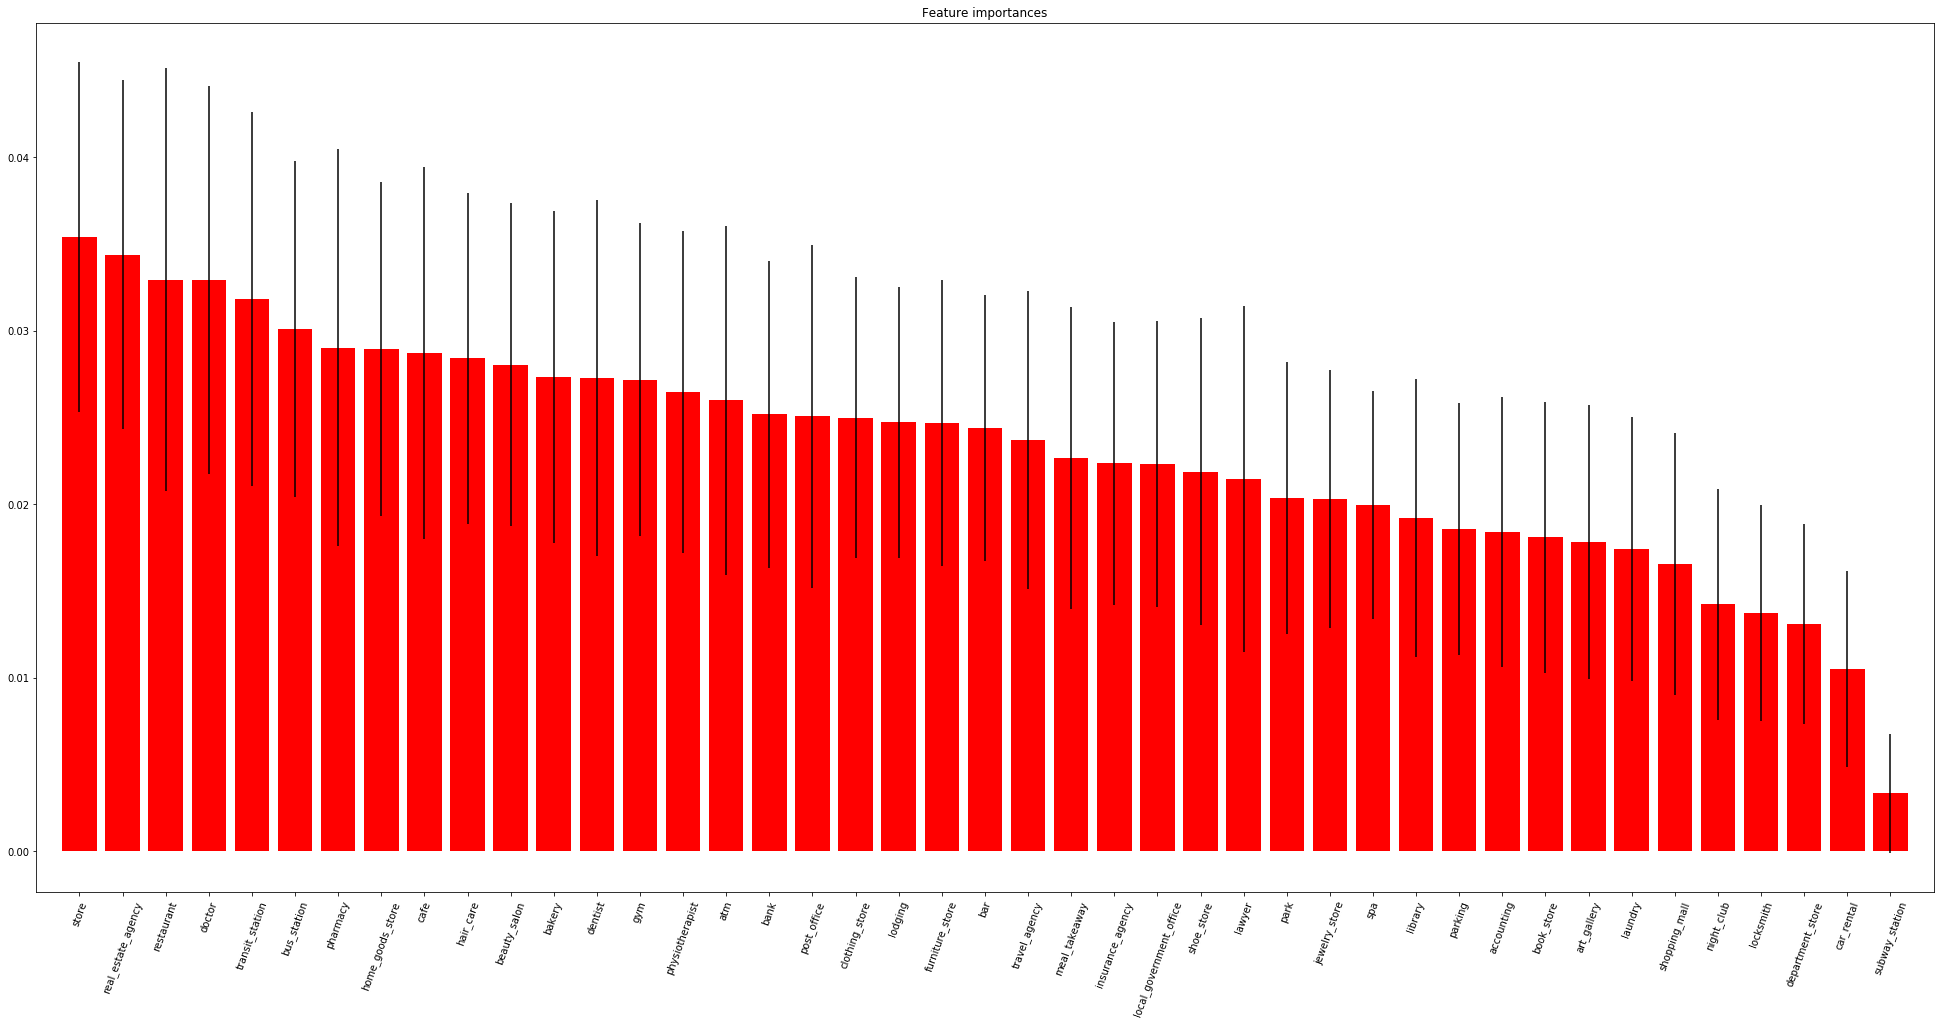

Optimal number of features : 41


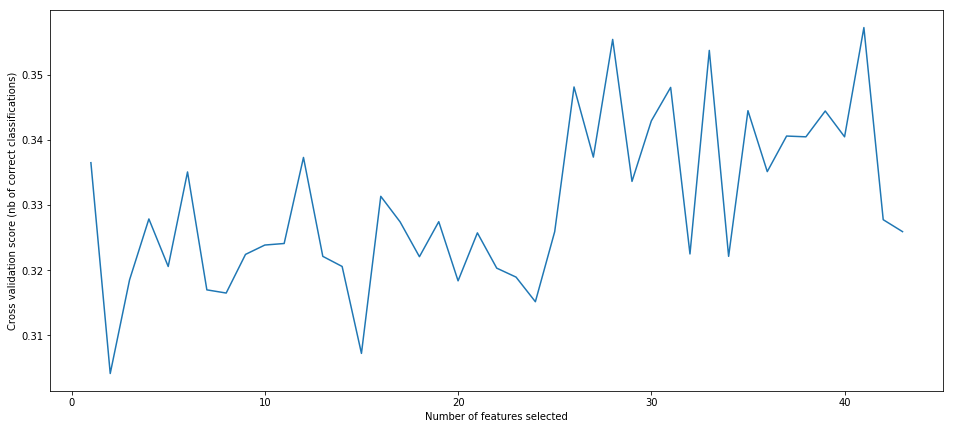

['store',
 'real_estate_agency',
 'restaurant',
 'doctor',
 'transit_station',
 'bus_station',
 'pharmacy',
 'home_goods_store',
 'cafe',
 'hair_care']

In [332]:
# testing ExtraTreesClassifier
# find best features and optimal feature count
X,X_scaled,y,y_labeled,features,feature_dict,label_dict = prepare_data(features=top_feature_pearson(43),type='D',sprse=True)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=100,max_features='sqrt',random_state=25)
forest.fit(X, y_labeled)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
top_count = X.shape[1]
for f in range(X.shape[1]):
    print('{0} feature {1} {2} {3}'.format(f + 1, indices[f],feature_dict[indices[f]] ,importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(34,16))
plt.title("Feature importances")
plt.bar(range(top_count), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(top_count), dict(sorted(feature_dict.items(), key=lambda pair: indices.tolist().index(pair[0]))).values(),rotation=70)  
plt.xlim([-1, top_count])
plt.show()

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
forest = ExtraTreesClassifier(n_estimators=100,max_features='sqrt',random_state=25)
rfecv = RFECV(forest, step=1, cv=5,scoring='accuracy')
rfecv.fit(X, y_labeled)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(16,7))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

def top_feature_etc(n=10):
    X,X_scaled,y,y_labeled,features,feature_dict,label_dict = prepare_data(features=top_feature_pearson(43),type='D',sprse=True)
    forest = ExtraTreesClassifier(n_estimators=100,max_features='sqrt',random_state=25)
    forest.fit(X, y_labeled)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]
    features = [feature_dict[i] for i in indices]
    return list(features[:n])

In [340]:
X,X_scaled,y,y_scaled,features,feature_dict,label_dict = prepare_data(features=top_feature_etc(41),type='D',sprse=True)
X=svd.fit_transform(X)
forest = ExtraTreesClassifier(n_estimators=100,max_features='auto',random_state=25)
scores = cross_val_score(forest, X, y_scaled, cv=5)
np.mean(scores)

0.33116138946114082

Optimal number of features : 9


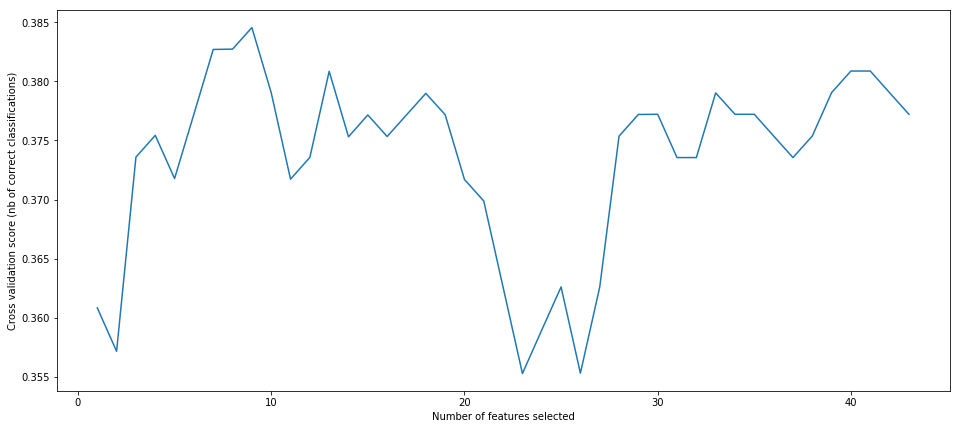

In [337]:
# testing C-Support Vector Classification

X,X_scaled,y,y_labeled,features,feature_dict,label_dict = prepare_data(features=top_feature_pearson(43),type='D',sprse=True)

svc = SVC(kernel="linear")
svc.fit(X_scaled, y_labeled)
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),scoring='accuracy')
rfecv.fit(X_scaled, y_labeled)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(16,7))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [342]:
X,X_scaled,y,y_labeled,features,feature_dict,label_dict = prepare_data(features=top_feature_pearson(9),type='D',sprse=True)
svc = SVC(kernel="linear")
scores = cross_val_score(svc, X_scaled, y_labeled, cv=5,scoring='accuracy',)
np.mean(scores)

0.36953095168391409

**training: constant learning-rate**

Training set score: 0.39267015706806285
Test set score: 0.35365853658536583
Training set loss: 1.2714112702357576


**training: constant with momentum**

Training set score: 0.5157068062827225
Test set score: 0.36585365853658536
Training set loss: 1.1327410553836779


**training: constant with Nesterov's momentum**

Training set score: 0.4790575916230366
Test set score: 0.3353658536585366
Training set loss: 1.1683459369307754


**training: inv-scaling learning-rate**

Training set score: 0.3769633507853403
Test set score: 0.35365853658536583
Training set loss: 1.3030762764969195


**training: inv-scaling with momentum**

Training set score: 0.39790575916230364
Test set score: 0.32926829268292684
Training set loss: 1.4589706833562601


**training: inv-scaling with Nesterov's momentum**

Training set score: 0.36649214659685864
Test set score: 0.35365853658536583
Training set loss: 1.3595497482187264


**training: adam**

Training set score: 0.5706806282722513
Test set score: 0.32926829268292684
Training set loss: 1.0333131560335216


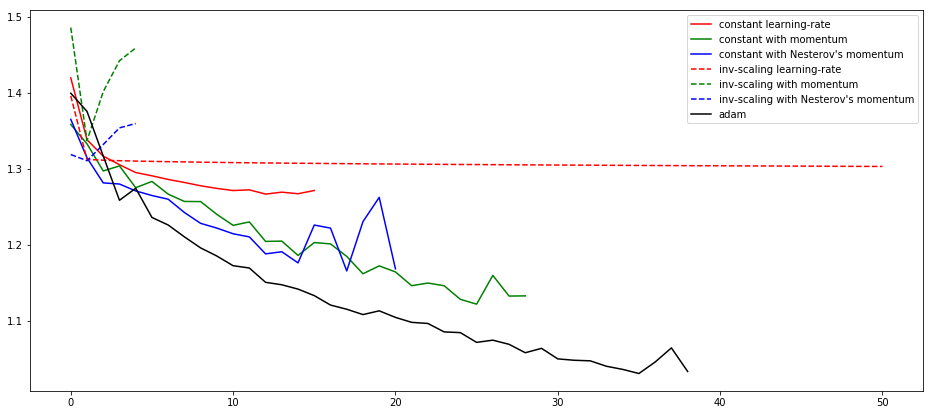

In [289]:
# testing Multi-layer Perceptron classifier.

# different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant learning-rate", "constant with momentum",
          "constant with Nesterov's momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum",
          "inv-scaling with Nesterov's momentum", "adam"]



plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]

def process_on_dataset(X, y):
    
    mlps = []
    max_iter = 1000
    activation ='tanh'
    hidden_layer_sizes = (70,50,30,)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
    for label, param in zip(labels, params):
        printmd("**training: {}**".format(label))
        
        mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                            max_iter=max_iter,activation=activation ,**param)
        
        mlp.fit(X_train, y_train)
        mlps.append(mlp)
        print("Training set score: {}".format(mlp.score(X_train, y_train)))
        print("Test set score: {}".format(mlp.score(X_test, y_test)))
        print("Training set loss: {}".format(mlp.loss_))
    
    plt.figure(figsize=(16, 7))
    for mlp, label, args in zip(mlps, labels, plot_args):
        plt.plot(mlp.loss_curve_, label=label, **args)
    plt.legend()
    plt.show()
            
X,X_scaled,y,y_labeled,features,feature_dict,label_dict = prepare_data(features=top_feature_pearson(43),type='D',sprse=True)
process_on_dataset(X_scaled,y_labeled)

In [364]:
# testing RandomForestRegressor
def top_feature_rfr(n=10):
    X,X_scaled,y,y_scaled,features,feature_dict = prepare_data(features=top_feature_pearson(52),sprse=True)
    rf = RandomForestRegressor(n_estimators=100, max_depth=70)
    rf.fit(X,y_scaled)
    indices = np.argsort(rf.feature_importances_)[::-1]
    features = [feature_dict[i] for i in indices]
    return list(features[:n])
X,X_scaled,y,y_scaled,features,feature_dict = prepare_data(features=top_feature_rfr(43)[::-1],sprse=True)
names = list(feature_dict.values())
scores = []
rf = RandomForestRegressor(n_estimators=25, max_depth=70)
# add feature to model and check error
for i in range(X.shape[1]):
    score = cross_val_score(rf, X[:, i:i+1],y_scaled, scoring="r2",cv=ShuffleSplit(n_splits=5, train_size=0.8, test_size=.2))    
    scores.append((round(np.mean(score), 3), names[i]))

print('\n'.join(['{} : {}'.format(f,v) for (f,v) in sorted(scores, reverse=True)]))                             
features_2 = [f for (v,f) in sorted(scores, reverse=True)]

0.605 : real_estate_agency
0.5 : jewelry_store
0.417 : hair_care
0.385 : local_government_office
0.255 : cafe
0.253 : laundry
0.209 : home_goods_store
0.183 : dentist
0.175 : lawyer
0.168 : library
0.151 : transit_station
0.149 : travel_agency
0.123 : beauty_salon
0.113 : department_store
0.11 : pharmacy
0.098 : shopping_mall
0.098 : park
0.091 : lodging
0.08 : subway_station
0.036 : bakery
0.018 : hospital
0.018 : furniture_store
-0.004 : movie_theater
-0.015 : church
-0.016 : funeral_home
-0.019 : store
-0.021 : liquor_store
-0.03 : bar
-0.051 : car_rental
-0.1 : locksmith
-0.104 : amusement_park
-0.117 : pet_store
-0.125 : book_store
-0.134 : insurance_agency
-0.152 : art_gallery
-0.156 : bank
-0.188 : atm
-0.193 : physiotherapist
-0.224 : spa
-0.4 : bus_station
-0.584 : restaurant
-0.81 : clothing_store
-1.12 : doctor


Optimal number of features : 41


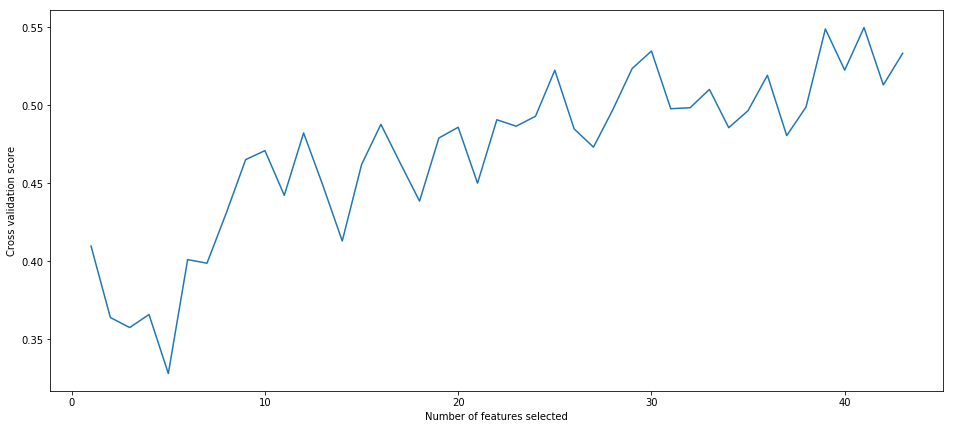

In [368]:
# Create the RFE object and compute a cross-validated score.
X,X_scaled,y,y_scaled,features,feature_dict = prepare_data(features=features_2,sprse=True)
rf = RandomForestRegressor(n_estimators=25, max_depth=70)
# The "r2" scoring is proportional R^2 (coefficient of determination) regression score function
rfecv = RFECV(estimator=rf, step=1, cv=ShuffleSplit(n_splits=5, train_size=0.8, test_size=.2),scoring='r2')
rfecv.fit(X, y_scaled)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(16,7))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [425]:
X,X_scaled,Y,y_scaled,features,feature_dict = prepare_data(features=features_2[:41])

rf = RandomForestRegressor(n_estimators=100, max_depth=70)
scores = cross_val_score(rf, X_train, y_train, cv=ShuffleSplit(n_splits=5, train_size=0.8, test_size=.2),scoring='r2')
print(scores)
np.mean(scores)

[ 0.71577442  0.81357168  0.47294362  0.17786032  0.36966027]


0.509962063266437

## Stage 8: Evaluation
During model development and before deployment, the data scientist evaluates the model to understand its quality and ensure that it properly and fully addresses the business problem. Model evaluation entails computing various diagnostic measures and other outputs such as tables and graphs, enabling the data scientist to interpret the model’s quality and its efficacy in solving the problem. For a predictive model, data scientists use a testing set, which is independent of the training set but follows the same probability distribution and has a known outcome. The testing set is used to evaluate the model so it can be re ned as needed. Sometimes the  nal model is applied also to a validation set for a  nal assessment.
In addition, data scientists may assign statistical significance tests to the model as further proof of its quality. This additional proof may be instrumental in justifying model implementation or taking actions when the stakes are high—such as an expensive supplemental medical protocol or a critical airplane  flight system.


In [404]:
!pip install treeinterpreter

In [441]:
X,X_scaled,y,y_scaled,features,feature_dict = prepare_data(features=features_2[:41])
rf = RandomForestRegressor(n_estimators=25, max_depth=70)
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=43)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=70,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [432]:
prediction1, bias1, contributions1 = ti.predict(rf, X_train, joint_contribution=True)
prediction2, bias2, contributions2 = ti.predict(rf, X_test, joint_contribution=True)

In [433]:
"""
Since biases are equal for both datasets (because the the model is the same),
the difference between the average predicted values has to come only from (joint) feature contributions.
In other words, the sum of the feature contribution differences should be equal to the difference in 
average prediction.
We can make use of the aggregated_contributions convenience method which takes the contributions for 
individual predictions and aggregates them together for the whole dataset

"""
aggregated_contributions1 = utils.aggregated_contribution(contributions1)
aggregated_contributions2 = utils.aggregated_contribution(contributions2)
 
print (np.sum(list(aggregated_contributions1.values())) - 
       np.sum(list(aggregated_contributions2.values())))
print (np.mean(prediction1) - np.mean(prediction2))

-0.019481222706
-0.019481222706


In [430]:
# understanding how different trees are working in forest
res = []
for k in set(aggregated_contributions1.keys()).union(
              set(aggregated_contributions2.keys())):
    res.append(([feature_dict[index] for index in k] , 
               aggregated_contributions1.get(k, 0) - aggregated_contributions2.get(k, 0)))   
         
for lst, v in (sorted(res, key=lambda x:-abs(x[1])))[:25]:
    printmd('**{}  :  {}**'.format(lst, v))

**['bus_station']  :  -0.018796415638978665**

**['dentist']  :  -0.006507145892447438**

**['lawyer', 'subway_station', 'amusement_park', 'physiotherapist', 'doctor']  :  -0.004155194688067769**

**['car_rental', 'bus_station']  :  0.003735777904108888**

**['bank', 'physiotherapist', 'bus_station']  :  -0.003722967011006209**

**['furniture_store', 'bus_station', 'doctor']  :  0.003117392461832641**

**['pharmacy', 'subway_station', 'book_store']  :  -0.0031112389955918886**

**['subway_station']  :  0.0030278189014434965**

**['physiotherapist', 'bus_station']  :  -0.0029985993831436867**

**['subway_station', 'physiotherapist']  :  0.002801033940701851**

**['jewelry_store', 'dentist', 'liquor_store']  :  0.0027469485209624003**

**['cafe', 'furniture_store']  :  -0.0025316766071092995**

**['furniture_store', 'bus_station']  :  -0.0022901178851320245**

**['bar', 'bus_station']  :  -0.0022728674928952555**

**['transit_station', 'bus_station']  :  0.00217823863564392**

**['local_government_office', 'subway_station']  :  0.0019304320892681171**

**['cafe', 'amusement_park']  :  -0.0019093498344408626**

**['library', 'transit_station']  :  -0.0017882302686669754**

**['subway_station', 'liquor_store', 'physiotherapist']  :  0.0016379043415683727**

**['dentist', 'liquor_store']  :  -0.0015874318779084344**

**['cafe', 'lodging', 'bar']  :  0.0015311073433160178**

**['car_rental']  :  0.001492779703000238**

**['lawyer', 'subway_station', 'locksmith', 'amusement_park']  :  -0.0014625520753671656**

**['cafe', 'amusement_park', 'bus_station']  :  -0.0014584971793748893**

**['local_government_office', 'furniture_store']  :  -0.0014581582313540728**

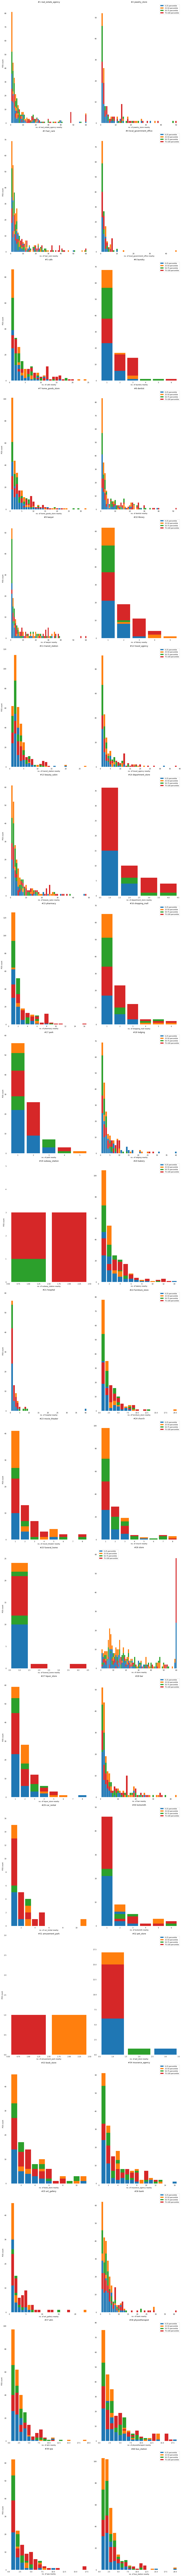

In [452]:
# selected feature distibution plots
X,X_scaled,y,y_labled,features,feature_dict,label_dict = prepare_data(features=features_2[:41],type='D')
fig, axes = plt.subplots(nrows=len(feature_dict.keys())//2, ncols=2, figsize=(16,225))

for ax,cnt in zip(axes.ravel(), range(len(feature_dict.keys()))):  
    # set bin sizes
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)

    b1=None
    # plottling the bars   
    for lab,col in zip(range(1,5), ('blue', 'red', 'green','orange')):
        x = list(np.unique(X[:,cnt]))
        x.remove(0)
        unique, counts = np.unique(X[y_labled==lab, cnt], return_counts=True)
        counts = dict(zip(unique, counts))
        missing = list(set(x) - set(unique))
        missing = dict((el,0) for el in missing)
        counts.update(missing)
        counts=dict(sorted(counts.items()))
        counts.pop(0, None)
        b2 = list(counts.values())
        p=ax.bar(x, b2,width =0.85,bottom=b1,label='{}'.format(label_dict[lab]))
        b1 = b2

    ylims = ax.get_ylim()    
    # plot annotation
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel('no. of {} nearby'.format(feature_dict[cnt]))
    ax.set_title('#{0} {1}'.format(str(cnt+1),feature_dict[cnt]))

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    
    
    axes[cnt//2][0].set_ylabel('POS count')
    if cnt % 2 != 0:
        ax.legend()

fig.tight_layout()       
plt.show()

fig = tls.mpl_to_plotly(fig)
fig['layout'].update(showlegend=True)
py.iplot(fig)


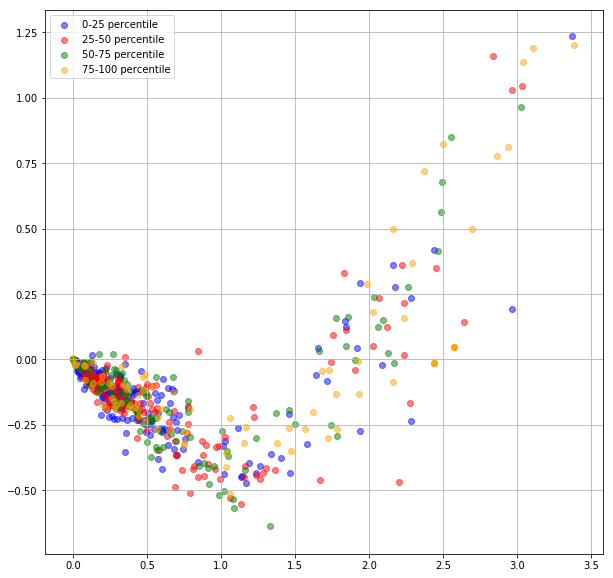

In [445]:
X,X_scaled,y,y_scaled,features,feature_dict,label_dict = prepare_data(type='D',features=features_2[:41],sprse=True)


svd = TruncatedSVD(n_components=2,algorithm='arpack' ,n_iter=7, random_state=42)
svd.fit(X_scaled)
X=svd.fit_transform(X_scaled)
fig1,ax = plt.subplots(figsize=(10, 10))
for lab,col in zip(range(1,5), ('blue', 'red', 'green','orange')):
        ax.scatter(X[y_scaled==lab, 0], X[y_scaled==lab, 1], c=col,alpha=0.5,label='{}'.format(label_dict[lab]))
ax.legend()
ax.grid(True)
plt.show()

## Stage 9: Deployment
Once a satisfactory model has been developed and is approved by the business sponsors, it is deployed into the production environment or a comparable test environment. Usually it is deployed in a limited way until its performance has been fully evaluated. Deployment may be as simple as generating a report with recommendations, or as involved as embedding the model in a complex work flow and scoring process managed by a custom application. Deploying a model into an operational business process usually involves additional groups, skills and technologies from within the enterprise. For example, a sales group may deploy a response propensity model through a campaign management process created by a development team and administered by a marketing group. 



- Strategy using top features

- A/B test


## Stage 10: Feedback
By collecting results from the implemented model, the organization gets feedback on the model’s performance and
its impact on the environment in which it was deployed.
For example, feedback could take the form of response rates to a promotional campaign targeting stores identified by the model as high-potential locations. Analyzing this feedback enables to refine the model to improve its accuracy and usefulness. We can automate some or all of the feedback-gathering and model assessment, refinement and redeployment steps to speed up the process of model refreshing for better outcomes.

## Providing ongoing value to the organization
The  flow of the methodology illustrates the iterative nature of the problem-solving process. As data scientists learn
more about the data and the modeling, they frequently
return to a previous stage to make adjustments. Models are
not created once, deployed and left in place as is; instead, through feedback, re nement and redeployment, models are continually improved and adapted to evolving conditions. In this way, both the model and the work behind it can provide continuous value to the organization for as long as the solution is needed.

In [448]:
!pip install watermark
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [449]:
%watermark -a 'Shivam Pahuja' -d -p sklearn,numpy,pandas,matplotlib -v

Shivam Pahuja 2018-01-12 

CPython 3.6.3
IPython 6.1.0

sklearn 0.19.1
numpy 1.13.3
pandas 0.20.3
matplotlib 2.1.0
